In [1]:
import numpy as np
import astropy.constants as c
import math
import scipy
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# FUNCTIONS ARE DEFINED IN THE SECTION BELOW #

In [3]:
'''Uses the Gaussian as the height in the function to plot the Lorentzians'''
def lorentz_gauss(modes, Gauss, width):
    Lorentzh = np.zeros(len(x))
    for p in range(len(modes)):
        Lorentzh+=(Gauss*((1+((x - np.array(modes)[p])/(width/2))**2)**(-1)))
    Lorentzh_array = np.array(Lorentzh)
    return Lorentzh_array

In [4]:
'''Adds random noise'''
def addnoise(pure):
    vary = np.random.uniform(0, 1, pure.shape)
    signal = -(pure* np.log(vary))
    return (signal)

In [5]:
'''groups an array in groups of a given size then averaging them'''
def bin_it(yvalues, binsize):
    N=int(math.ceil(len(yvalues) / binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q)
        C+=1
    return np.array(newy)

In [6]:
# DEFINING SOLAR PARAMETERS #
delta_v_sun = 134.8 #microHz
D = 1.5
n = np.linspace(0, 40, 41)

l0= 0
l1 = 1
l2 = 2
l3 = 3

width = 10

frequency = []
for j in range(6000):
    frequency.append(j+1)
x = np.array(frequency)

H=5
epsilon=1.5
V_max_sun = 3100 #microHz
A_max_sun = 2.1 #ppm from Warrick's paper

''' CALCULATES MODES FOR DIFFERENT ANGULAR DEGREE, l AND RADIAL MODE, n '''
modes=[]
for i in range(len(n)):
    modes.append(delta_v_sun*(n[i]+((l0)/2)+epsilon)-D*(l0)*((l0)+1))
modes1=[]
for i in range(len(n)):
    modes1.append(delta_v_sun*(n[i]+((l1)/2)+epsilon)-D*(l1)*((l1)+1))
modes2=[]
for i in range(len(n)):
    modes2.append(delta_v_sun*(n[i]+((l2)/2)+epsilon)-D*(l2)*((l2)+1))
modes3=[]
for i in range(len(n)):
    modes3.append(delta_v_sun*(n[i]+((l3)/2)+epsilon)-D*(l3)*((l3)+1))

#Defines Gaussian curve with height A squared
sigma = 2.123*delta_v_sun #microHz
Gauss = (A_max_sun**2)*(np.exp(-0.5*((x-V_max_sun)/sigma)**2))

#Defines parameters for granulation
tau_sun = 200 #seconds
g_sun = 274 #metres per second squared
T_eff_sun = 5777 #Kelvin
sigma_sun = 50000/(c.R_sun.value/(1000*10**3)) #ppm

granulation = (4*np.sqrt(2)*tau_sun/1e6*(sigma_sun)**2)/(1+(2*np.pi*x*tau_sun/1e6)**4)
#ppm squared per micro hertz

#Defines width of the Lorentzians
alpha = -25.5+29.1 #for the Sun
gamma_alpha = 6.3 - 1.8 #for the Sun
linewidth = (alpha*np.log(x/V_max_sun)+np.log(gamma_alpha))

#Heights of modes scaled to their relative visibilities 
L0 = Lorentzh_array_0 = lorentz_gauss(modes, Gauss, linewidth)
L1 = Lorentzh_array_1 = lorentz_gauss(modes1, Gauss*1.5, linewidth)
L2 = Lorentzh_array_2 = lorentz_gauss(modes2, Gauss*0.5, linewidth)
L3 = Lorentzh_array_3 = lorentz_gauss(modes3, Gauss*0.04, linewidth)

# PUTTING TOGETHER ALL COMPONENTS
Osc = (L0 + L1 + L2 + L3)
G = granulation

shot_noises = []
min_mag = -1
max_mag = 13
nos = ((max_mag-min_mag)*4) +1
mags = np.linspace(min_mag, max_mag, nos) #(start, stop, no. outputs)
#print(mags)
for m in mags:
    vmag = np.full((6000), m) #here 8 defines the apparent magnitude
    shot_noises.append(18*10**(-0.4*(11.0-vmag)))

TotalSpec = []
for SNL in shot_noises:
    Spectrum = Osc + G + (SNL)
    TotalSpec.append(Spectrum)
#print(TotalSpec)

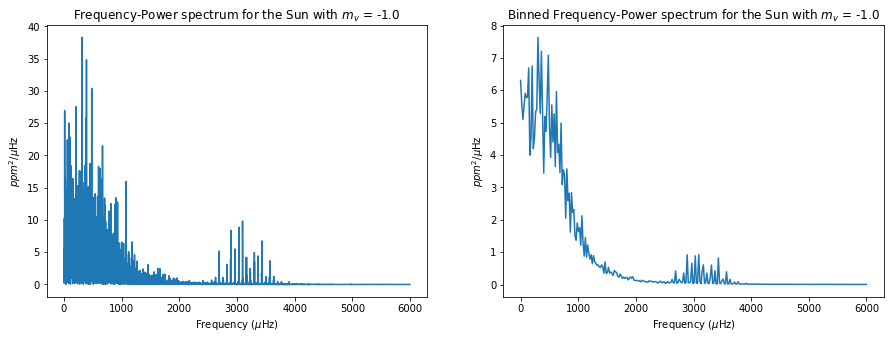

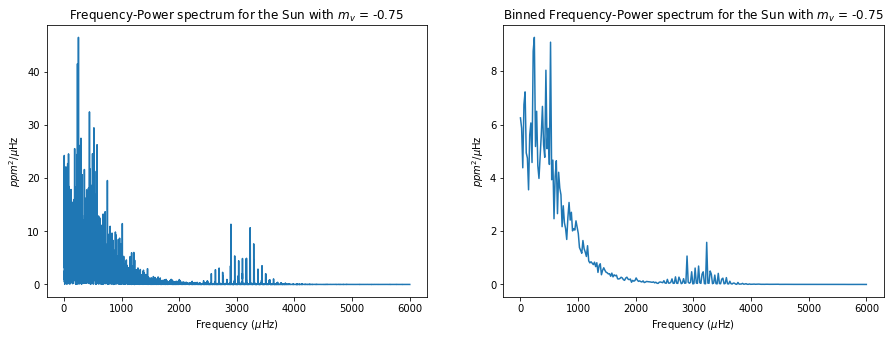

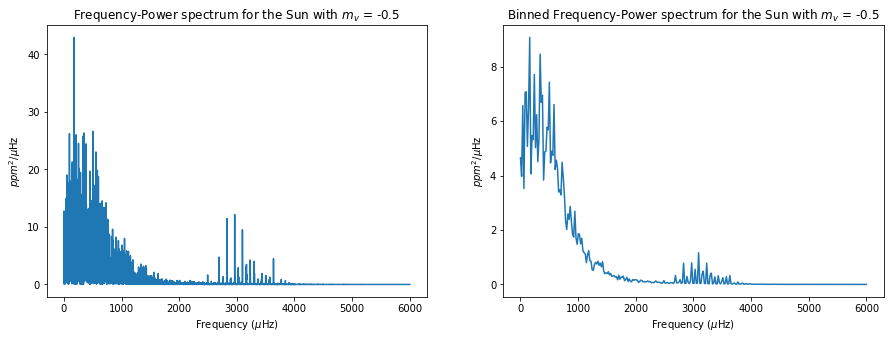

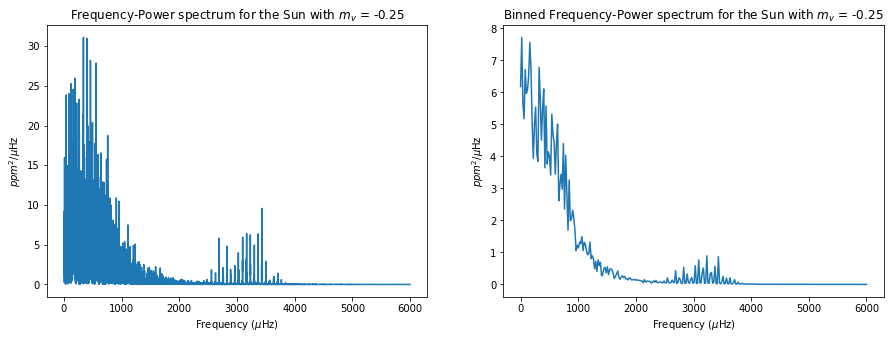

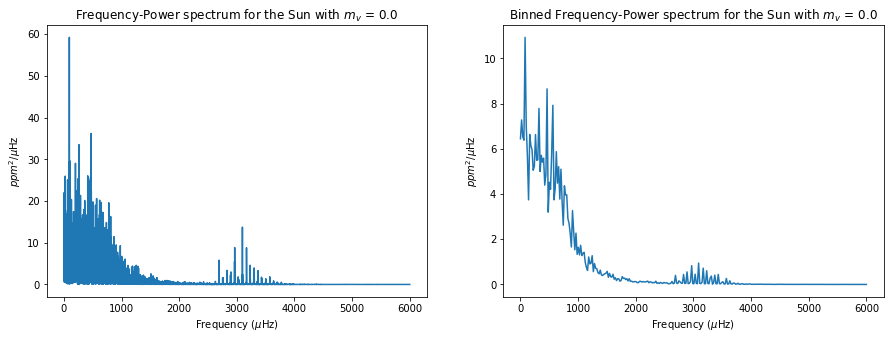

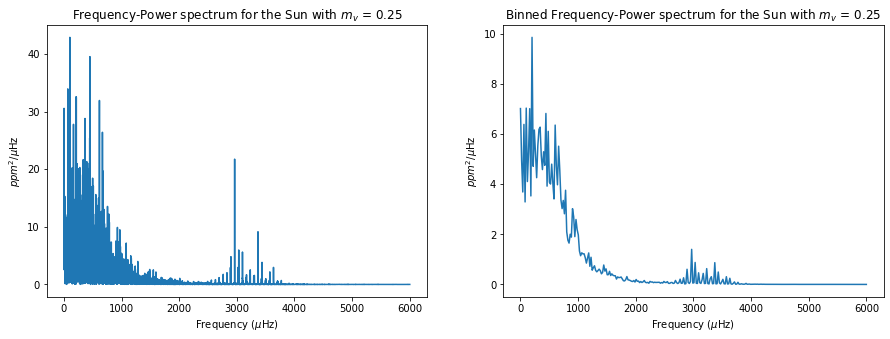

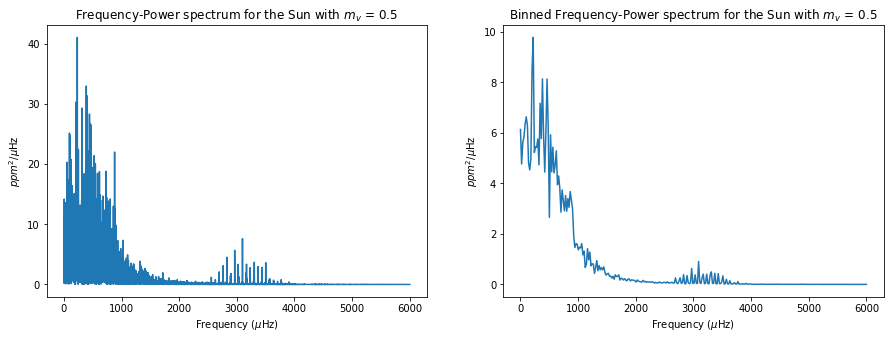

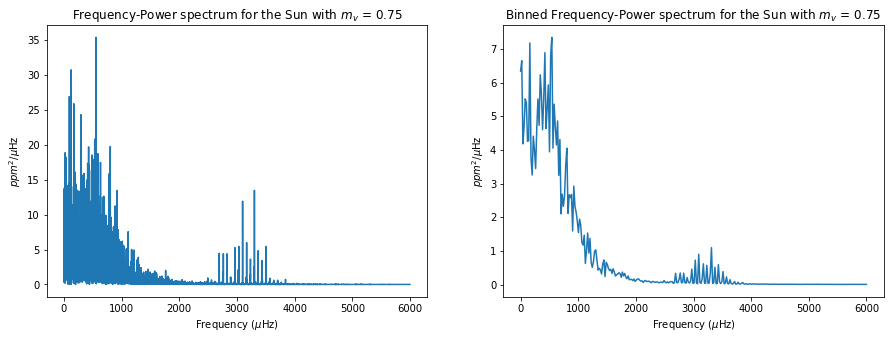

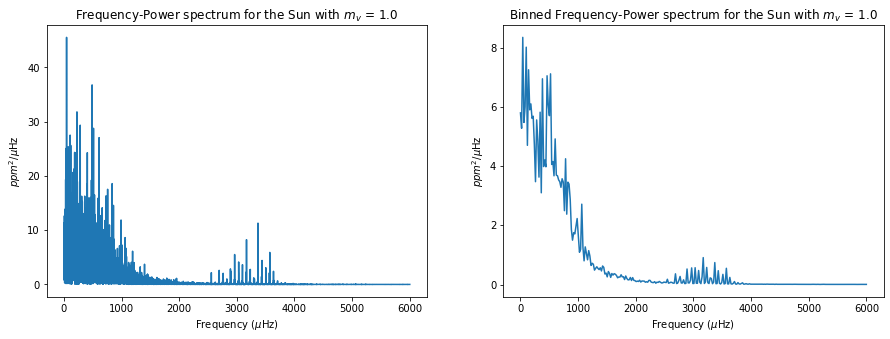

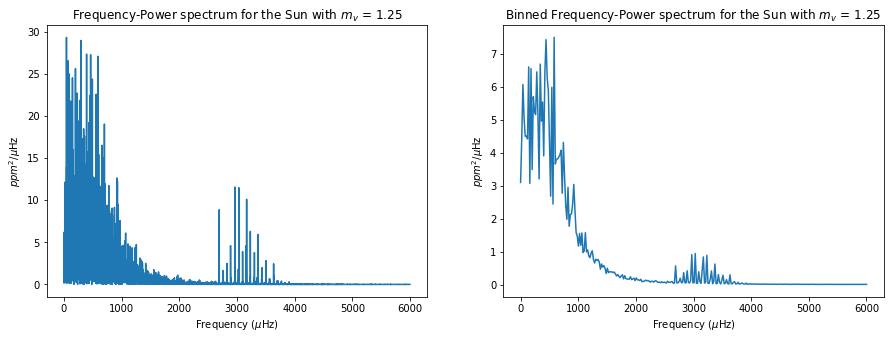

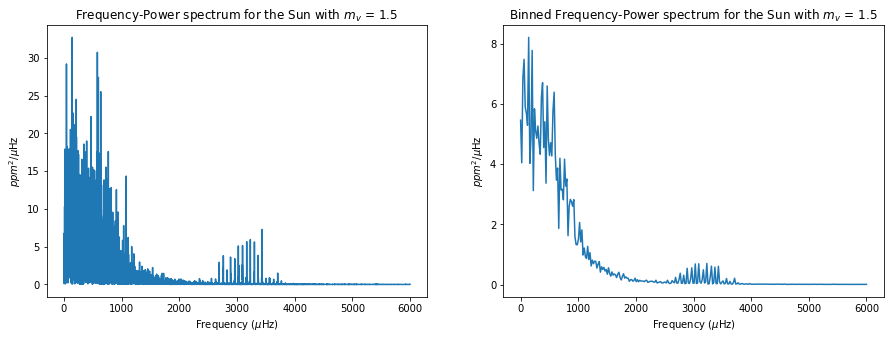

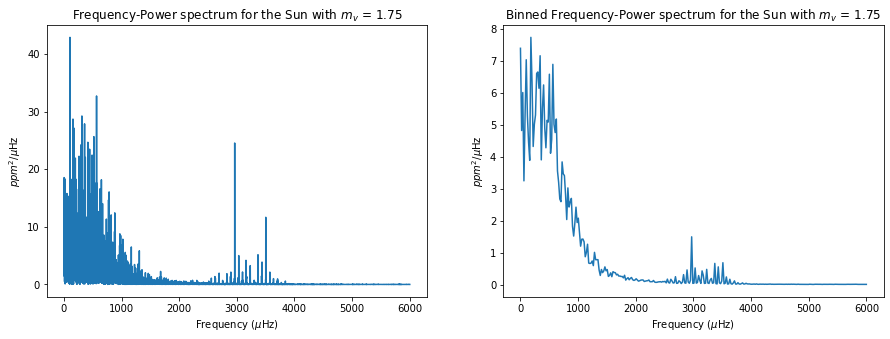

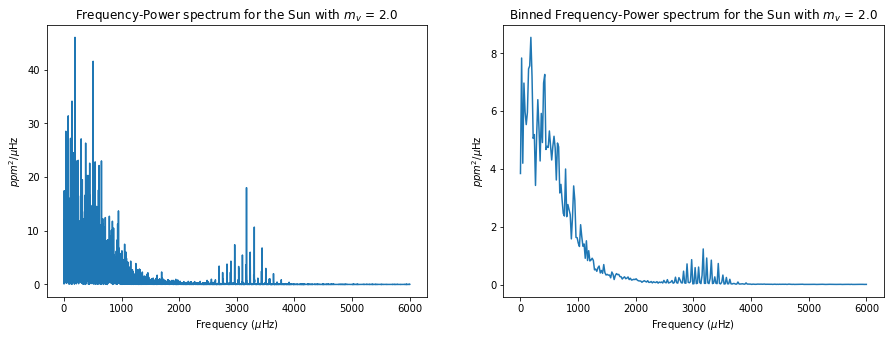

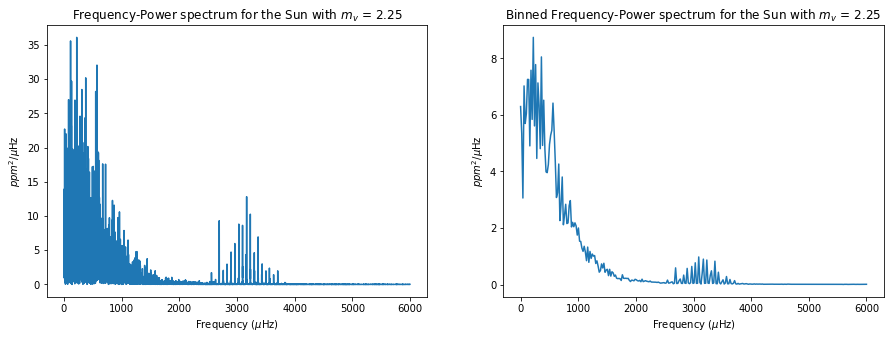

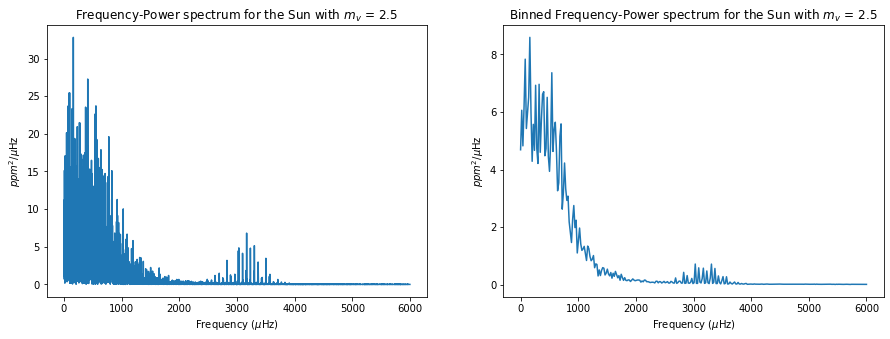

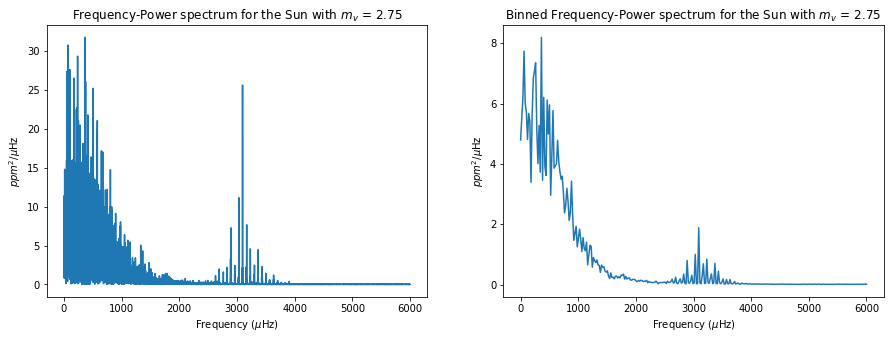

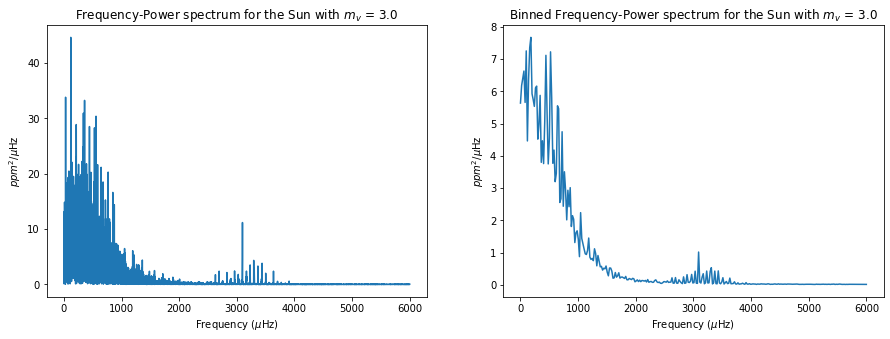

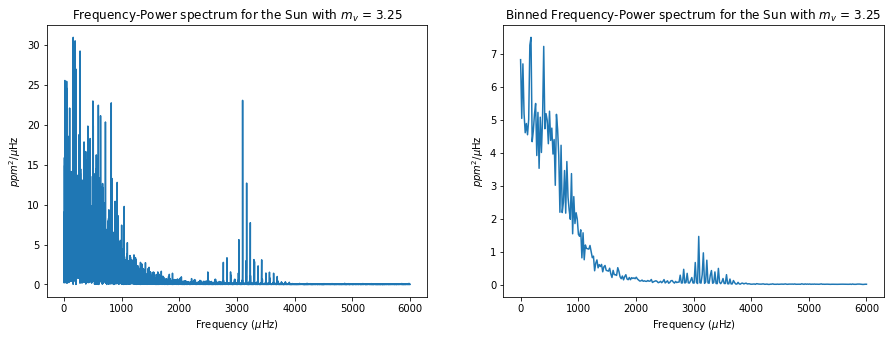

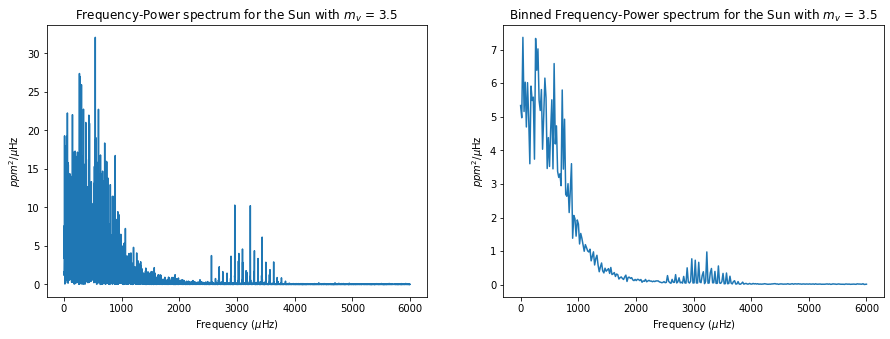

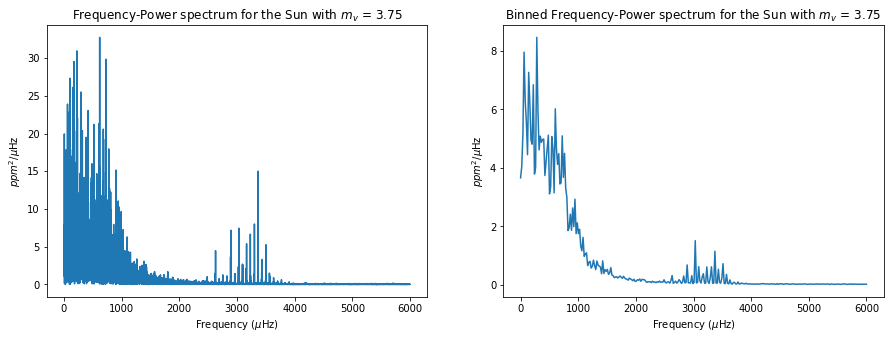

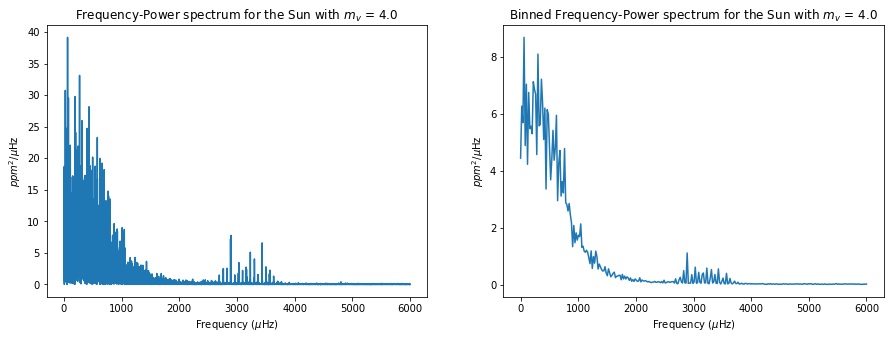

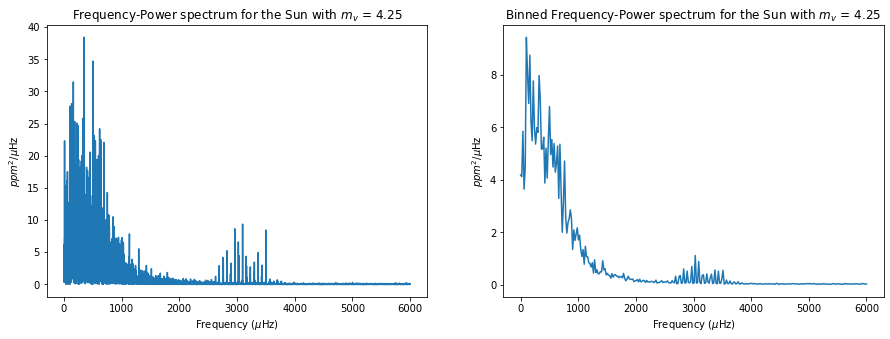

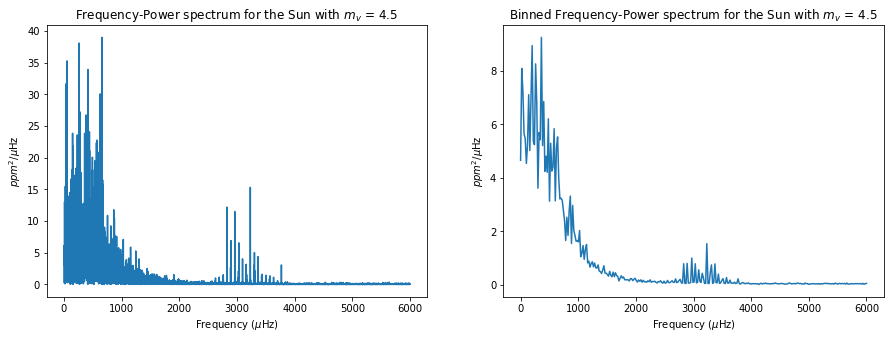

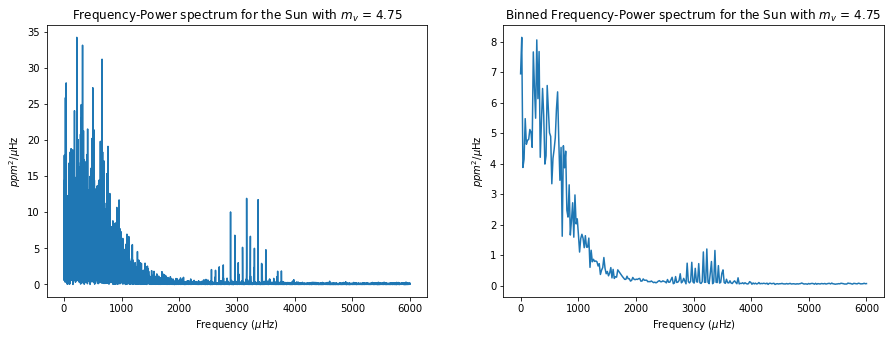

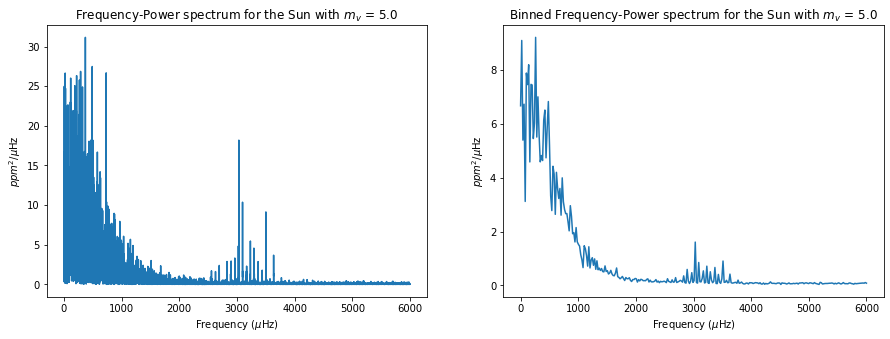

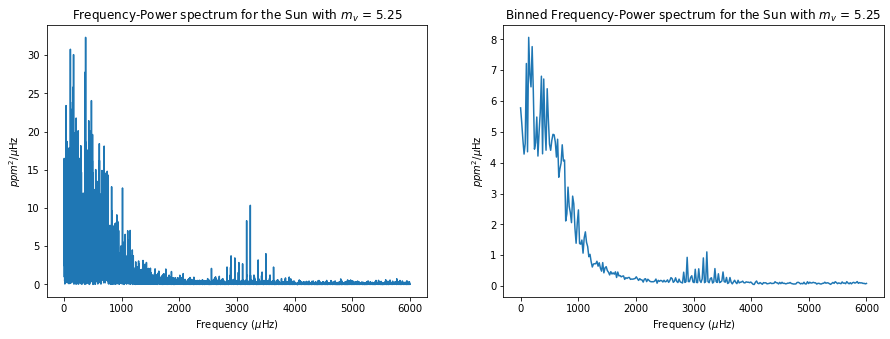

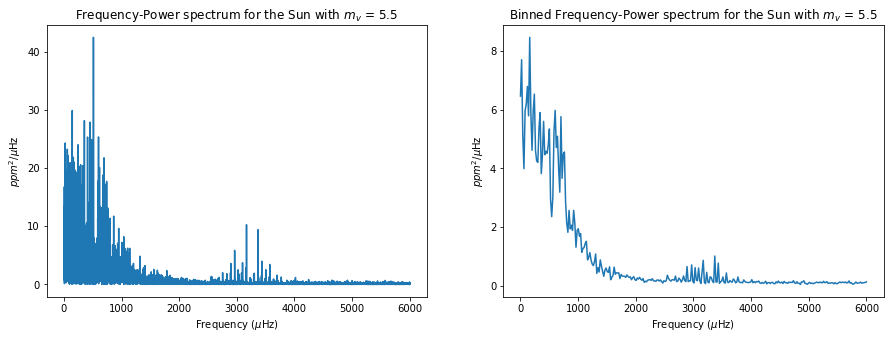

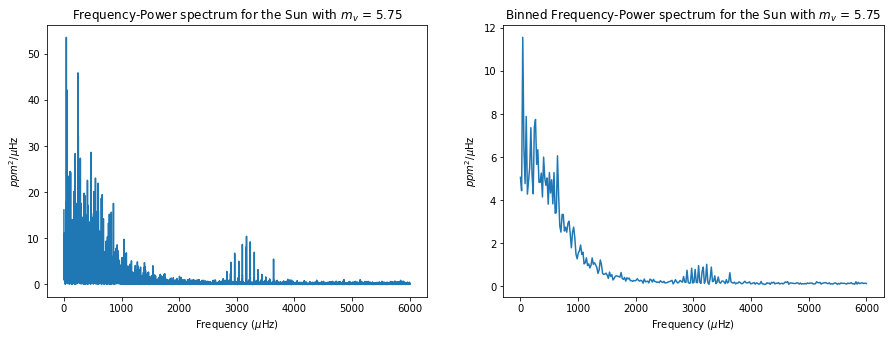

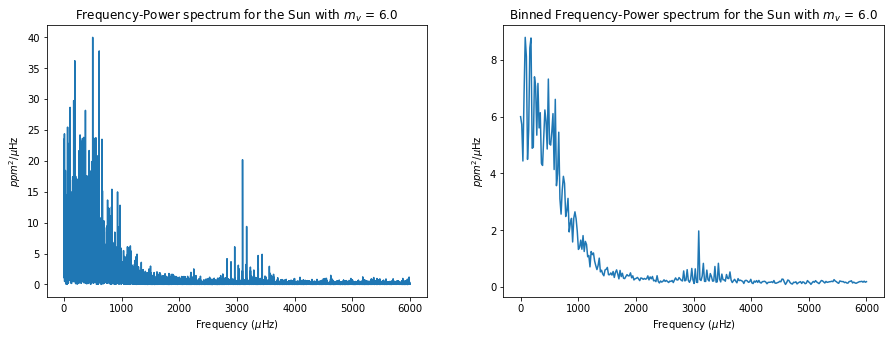

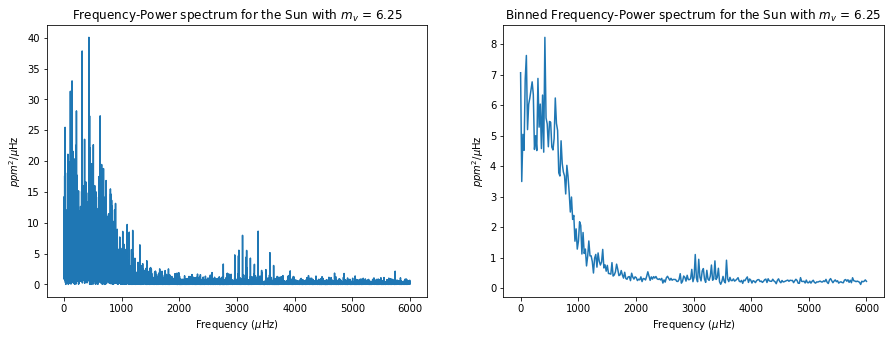

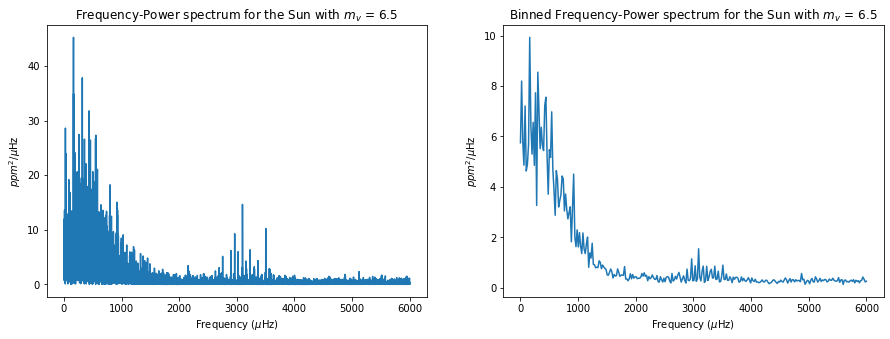

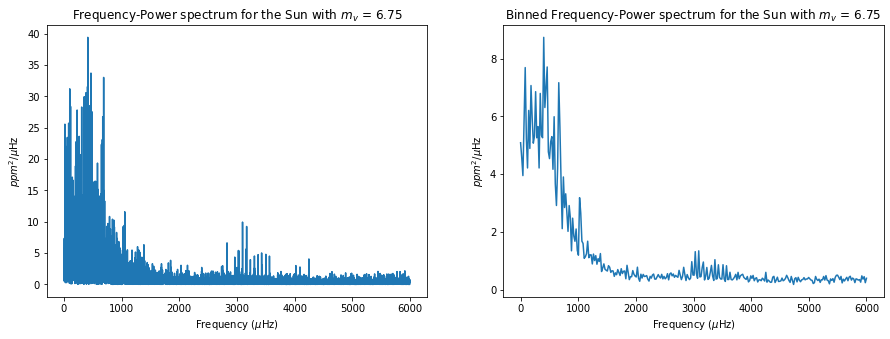

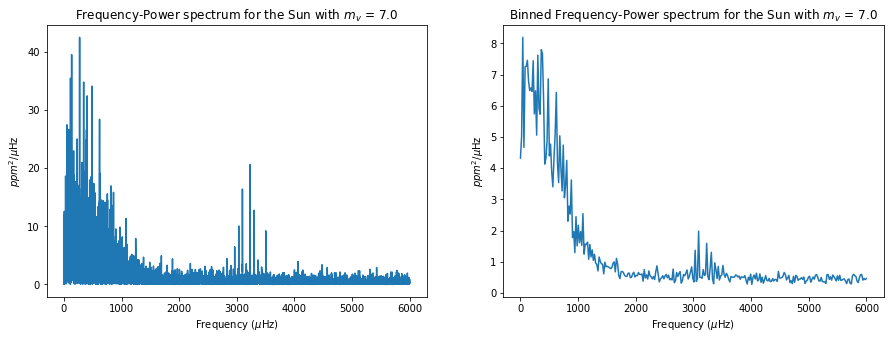

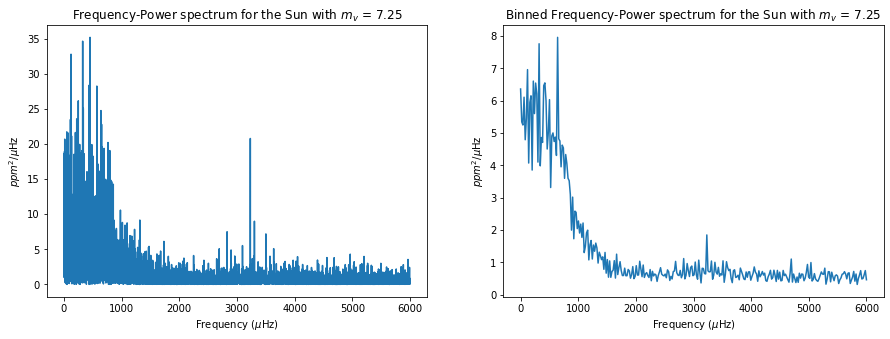

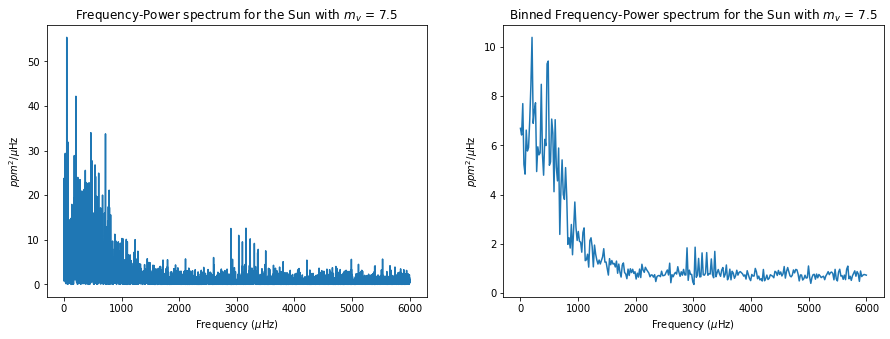

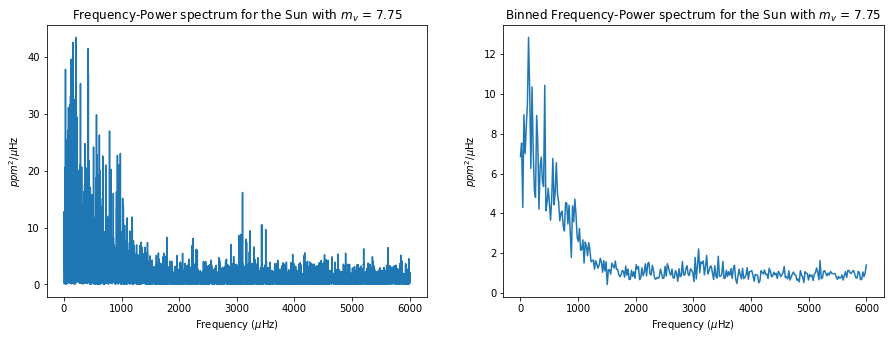

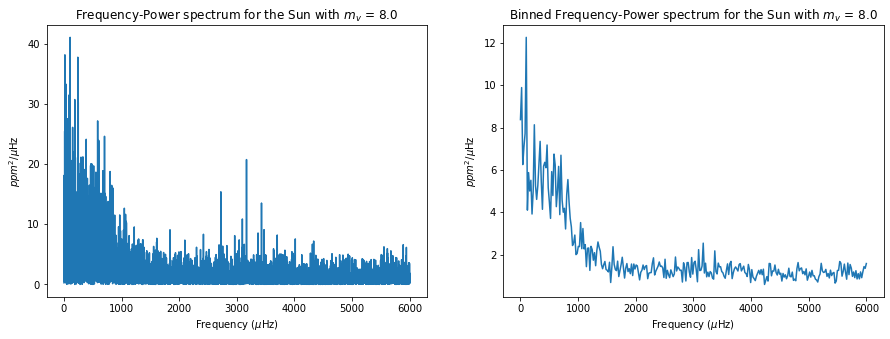

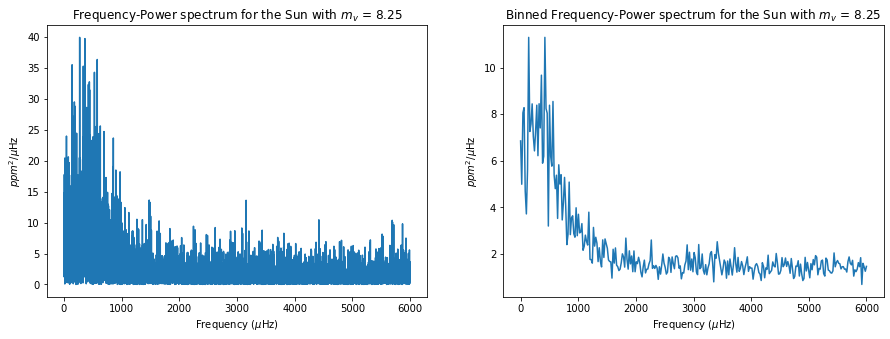

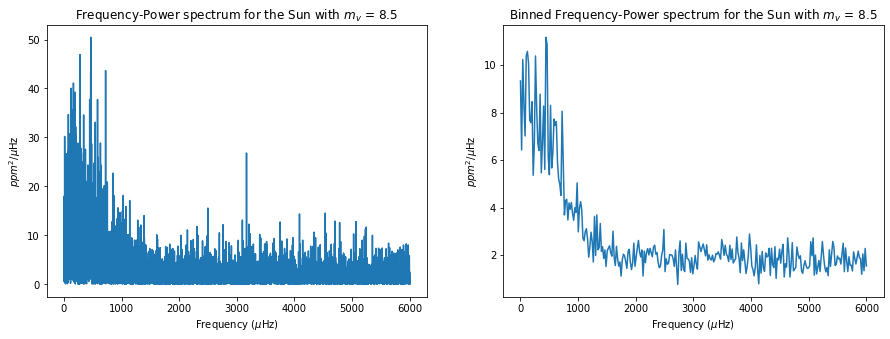

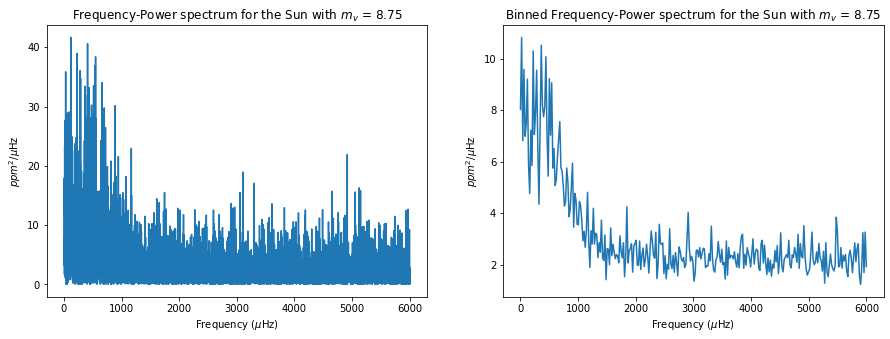

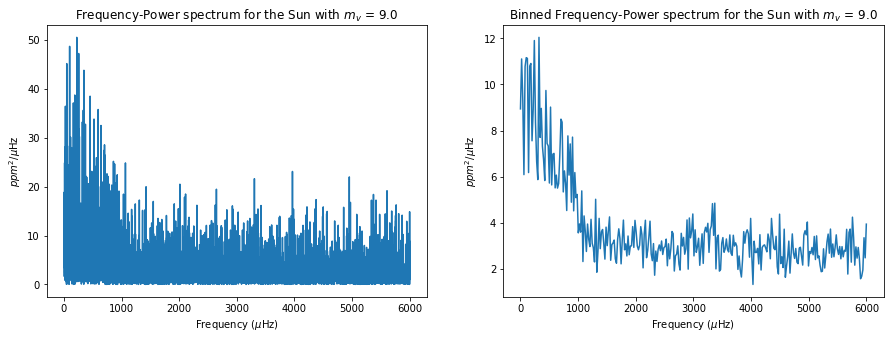

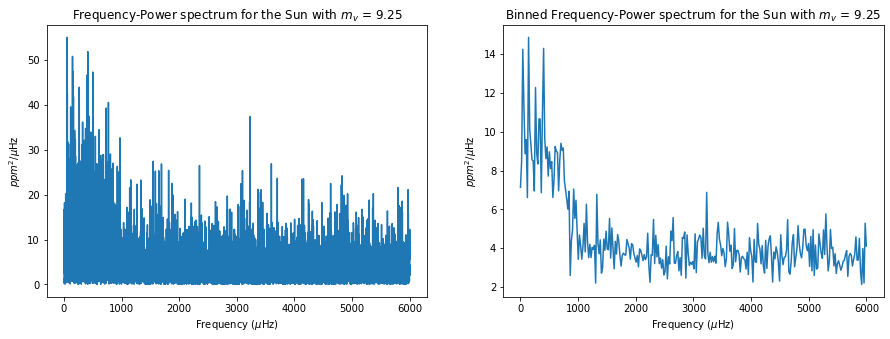

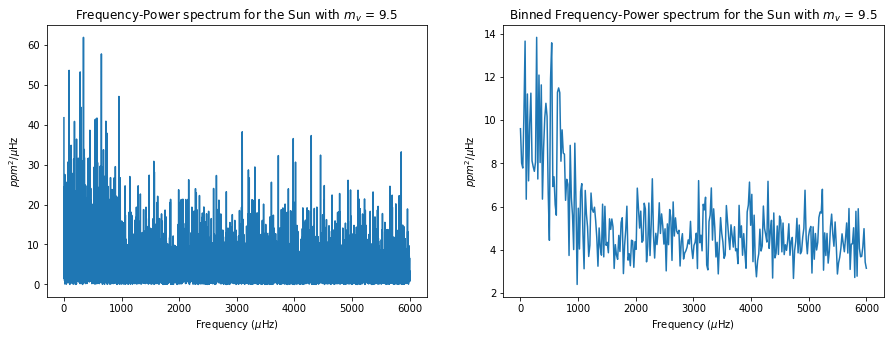

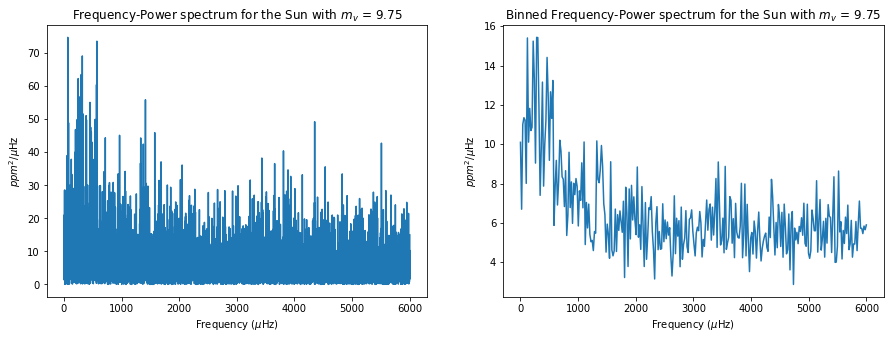

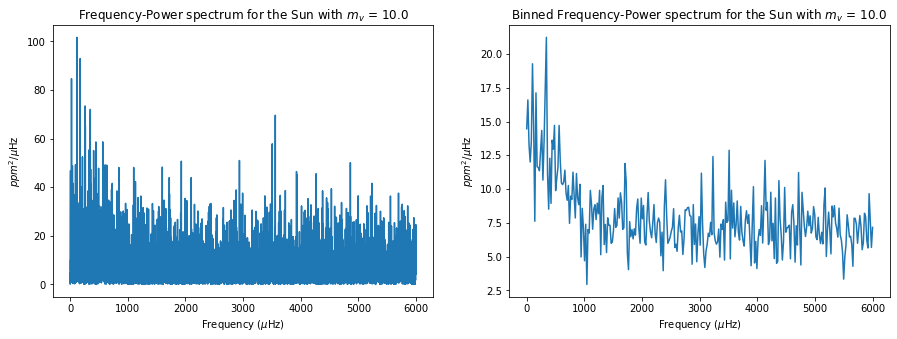

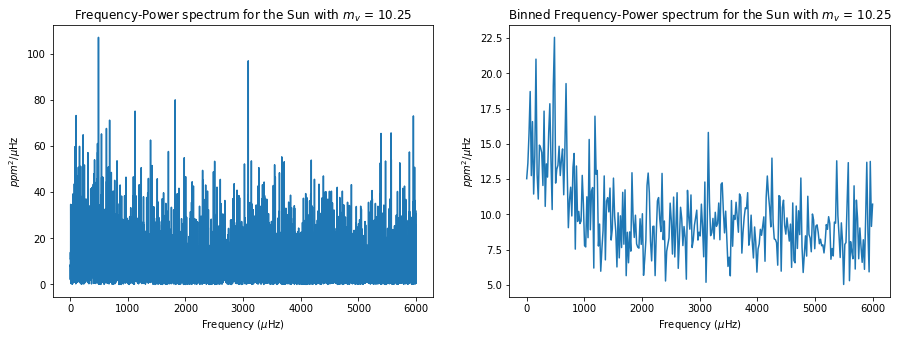

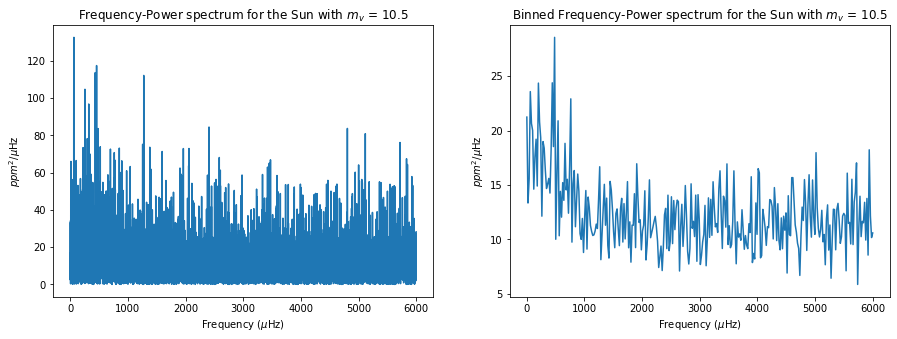

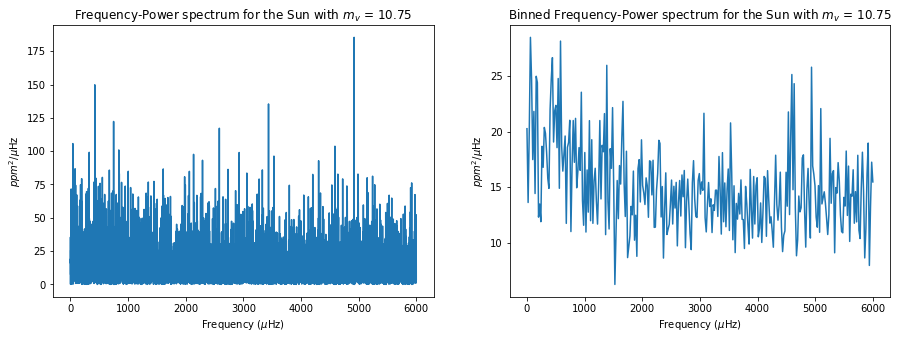

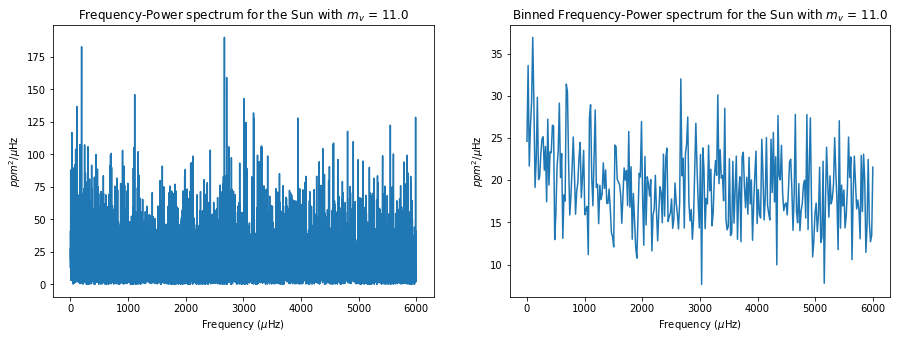

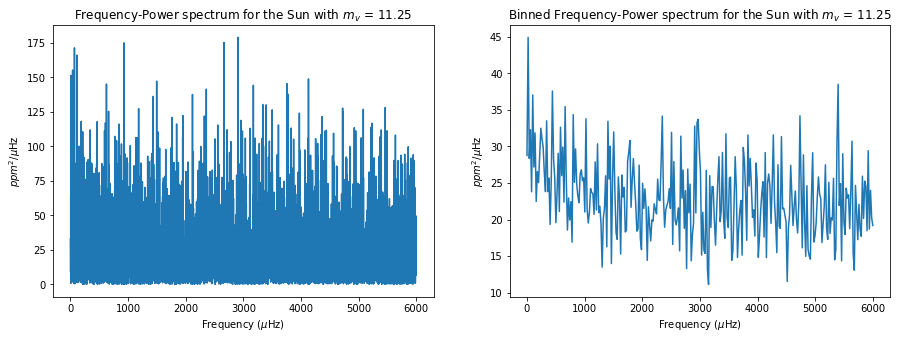

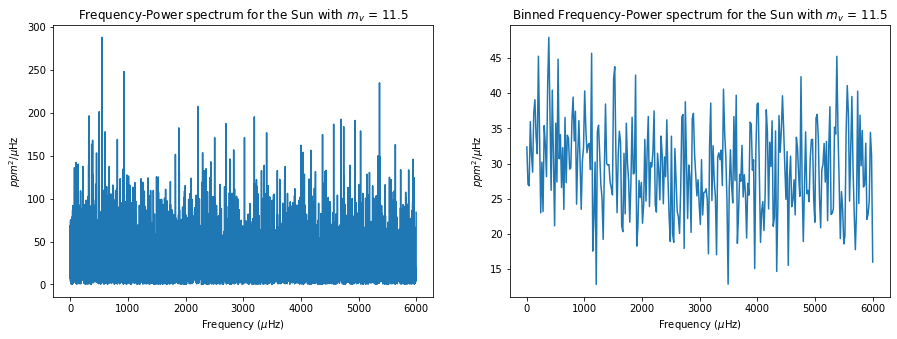

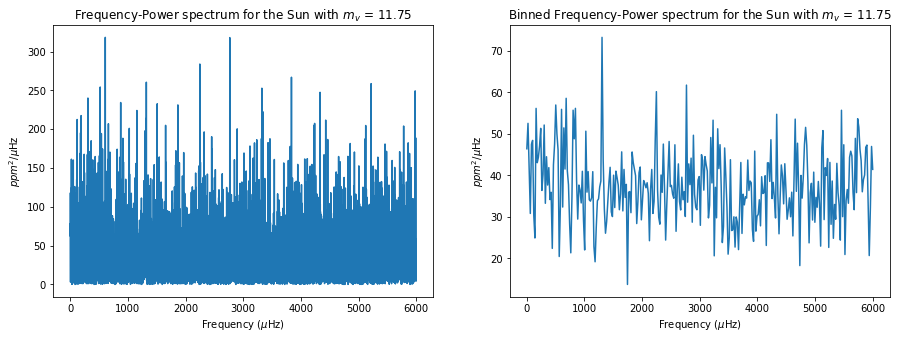

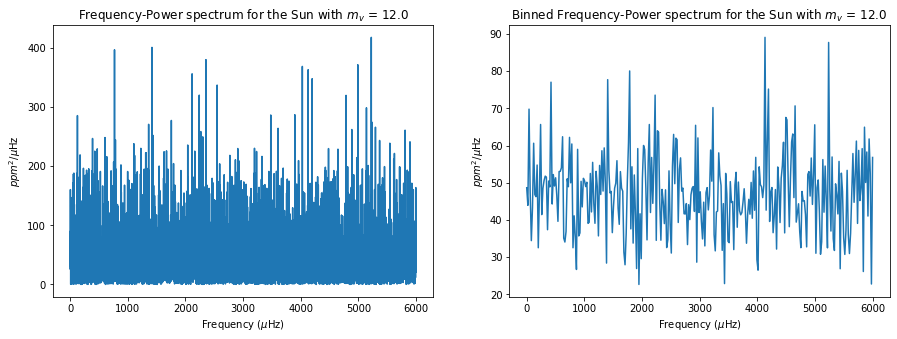

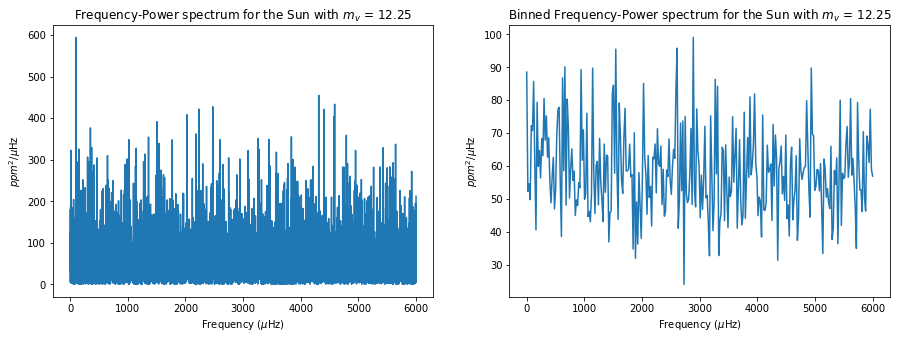

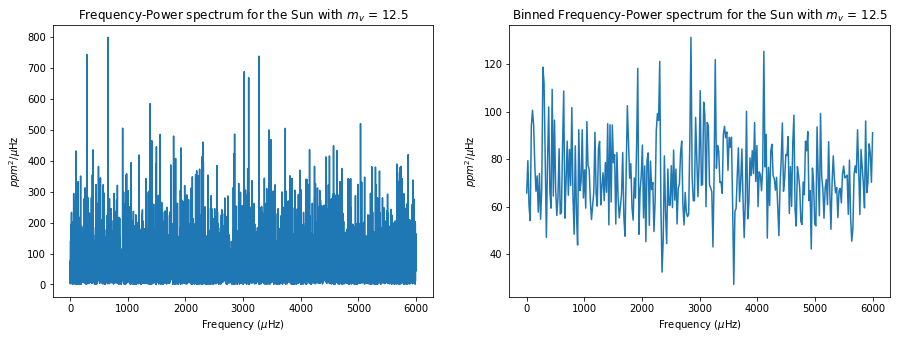

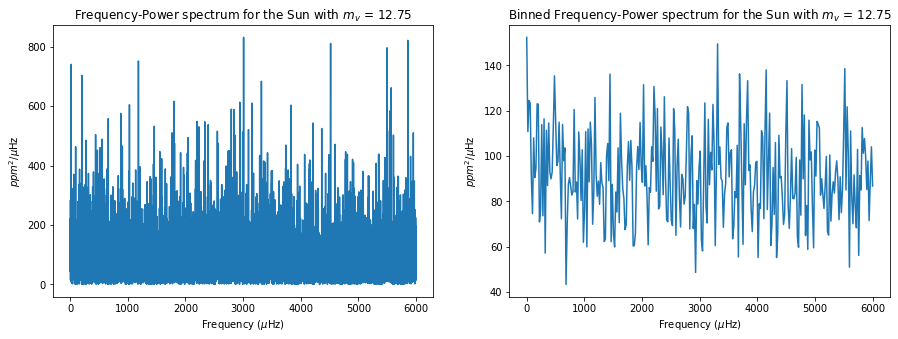

In [13]:
# SOLAR SPECTRUM FOR THE SUN WITH DIFFERENT APPARENT MAGNITUDES #
C=0
while C<len(TotalSpec)-1:
    Solar_Comp = addnoise(TotalSpec[C])
    plt.subplots(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, Solar_Comp)
    plt.title(f'Frequency-Power spectrum for the Sun with $m_v$ = {mags[C]}')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$ppm^2$/$\mu$Hz')
    
    #Solar_Comp_binned = SCb
    SCb = bin_it(Solar_Comp, 20)
    #binned_x-values = bx
    bx = np.linspace(0,len(Solar_Comp),len(SCb))
    plt.subplot(1, 2, 2)
    plt.plot(bx, SCb)
    plt.title(f'Binned Frequency-Power spectrum for the Sun with $m_v$ = {mags[C]}')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$ppm^2$/$\mu$Hz')
    #plt.savefig('Code Plots (Solar Spec)/Solar_Spectrum_(for mv = ' +str({mags[C]}) +').png', overwrite = True)
    plt.show()
    C+=1

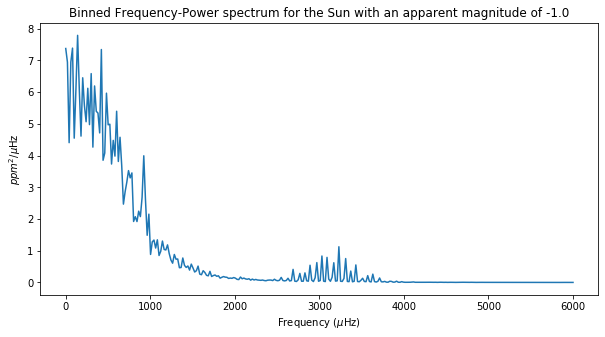

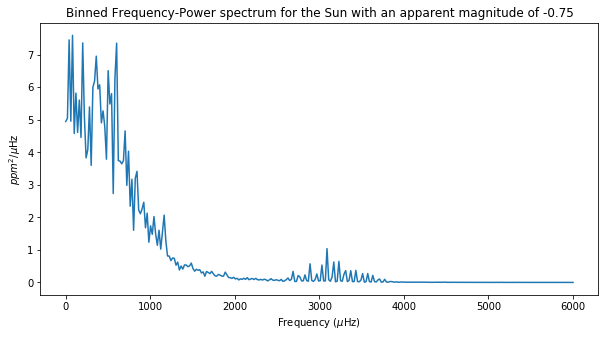

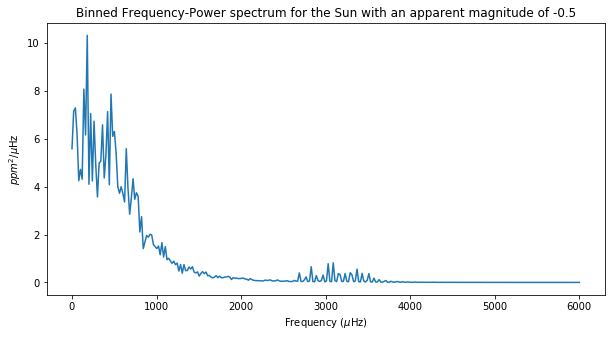

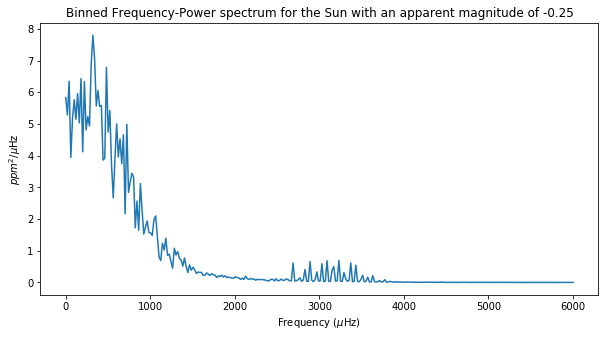

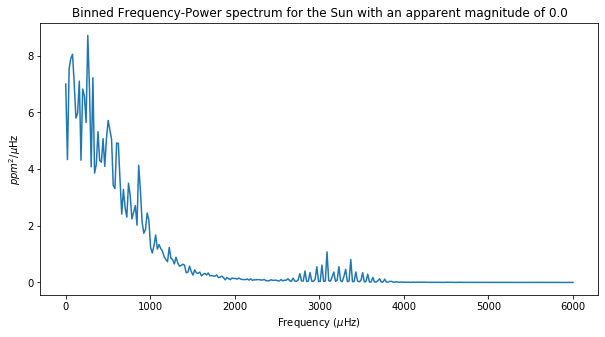

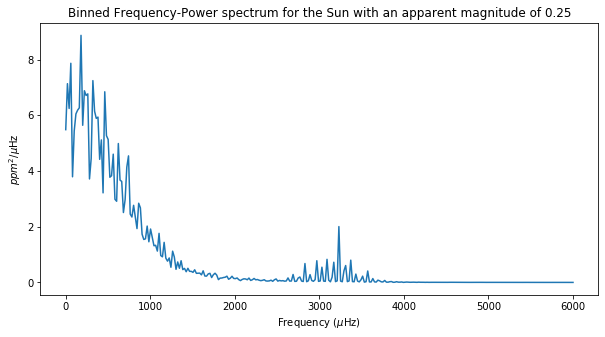

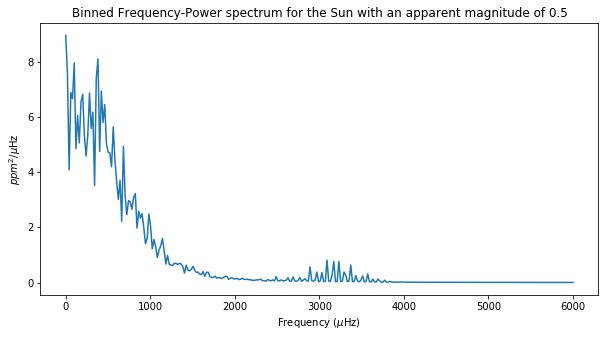

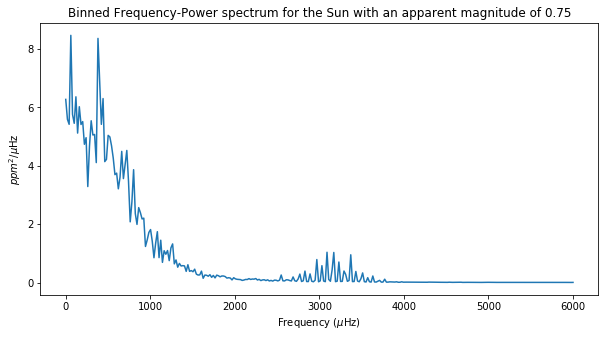

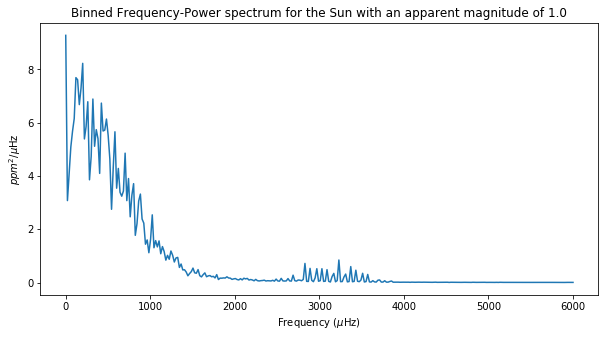

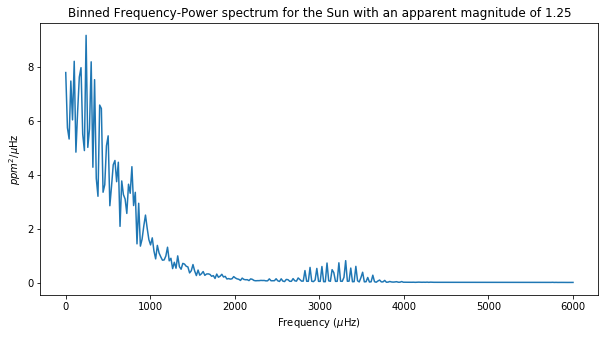

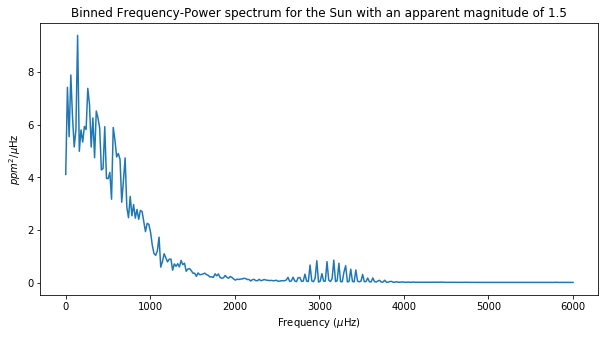

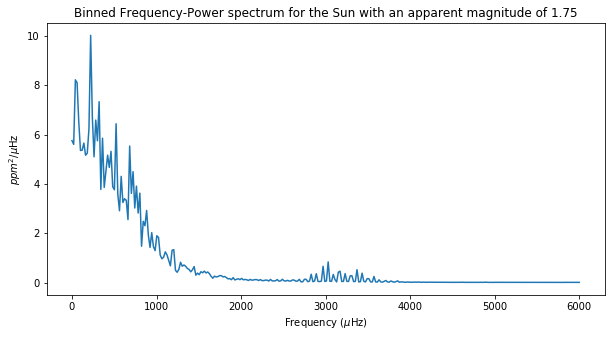

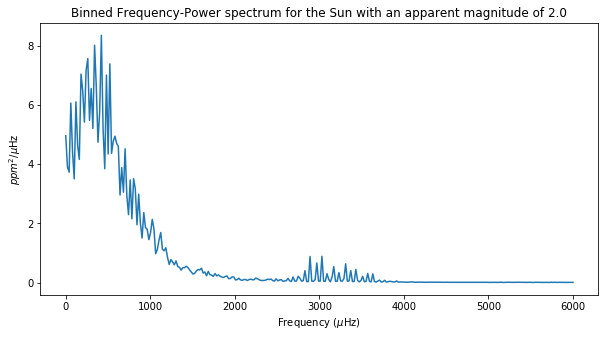

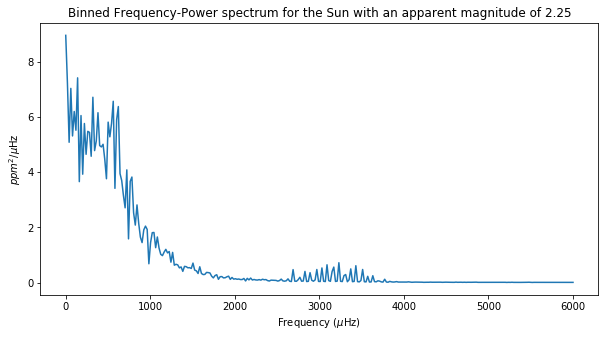

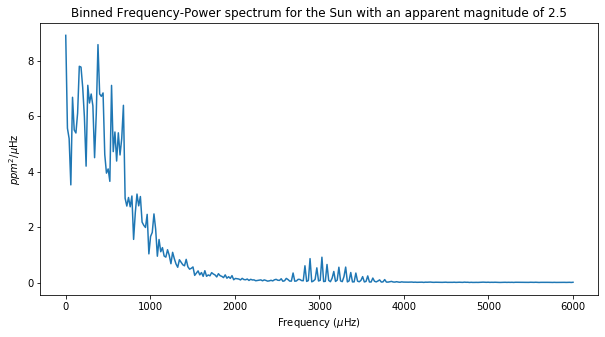

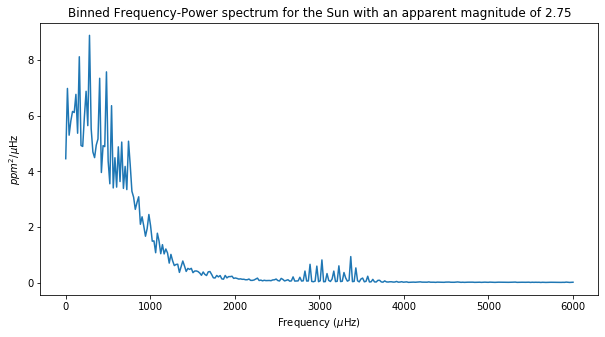

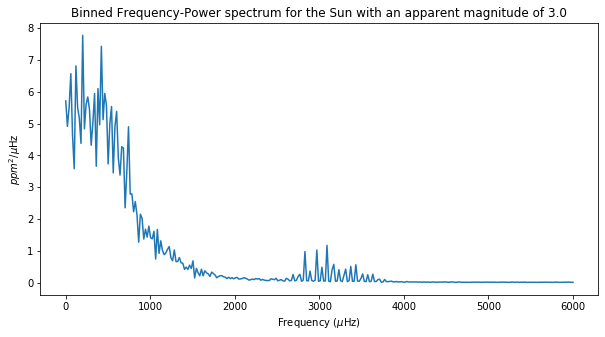

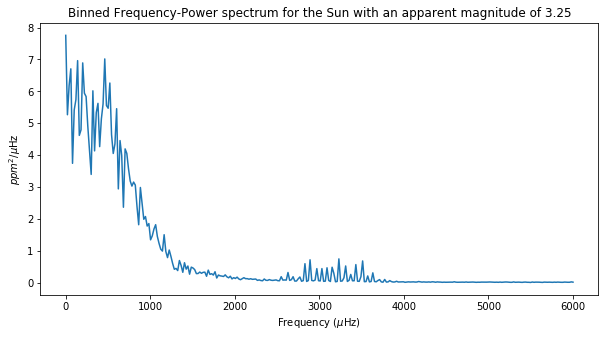

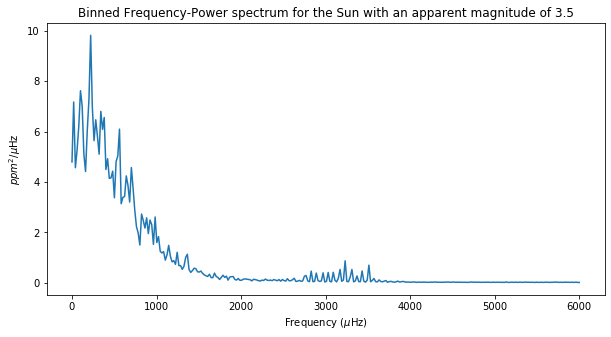

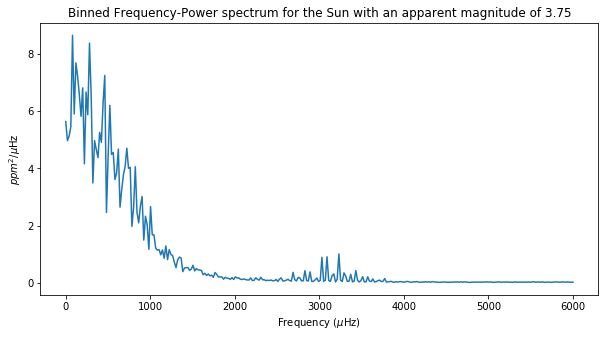

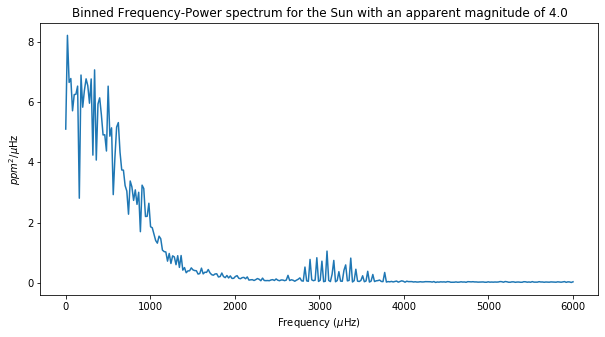

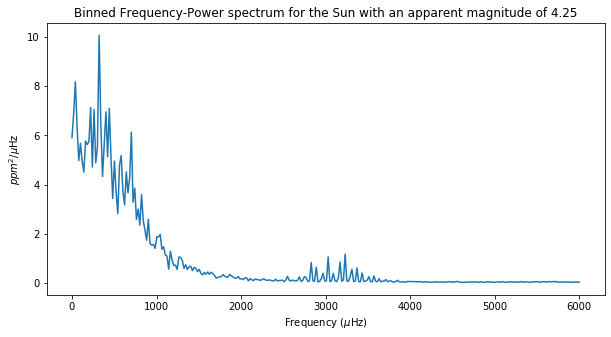

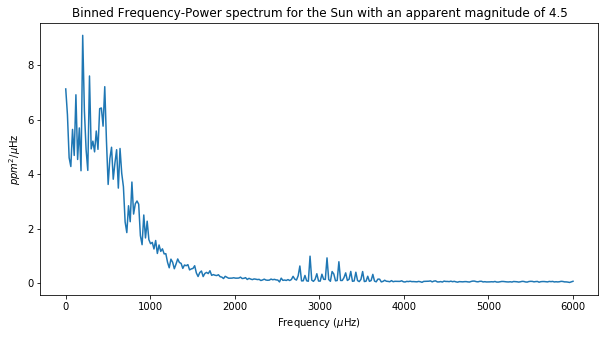

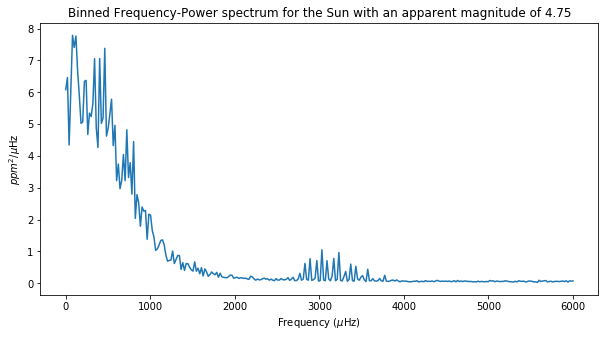

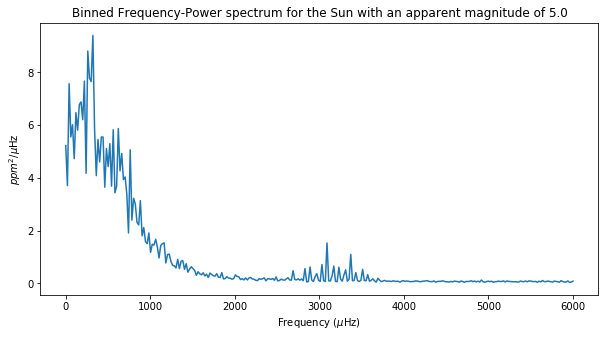

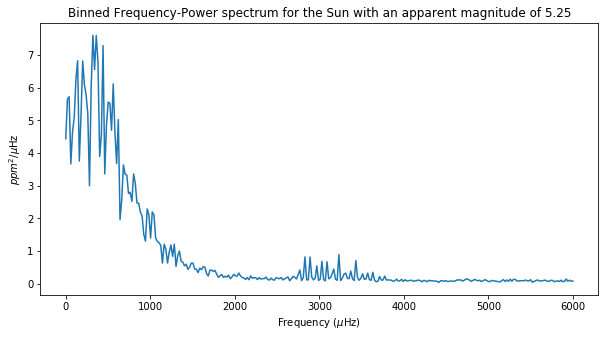

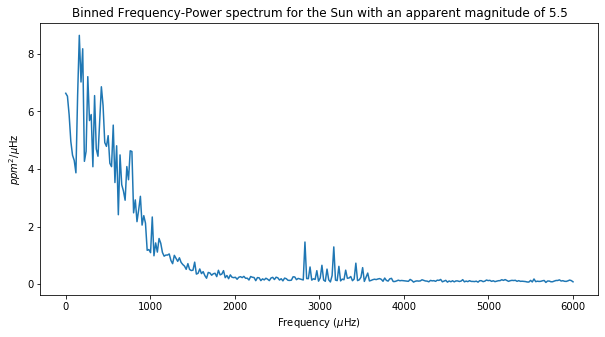

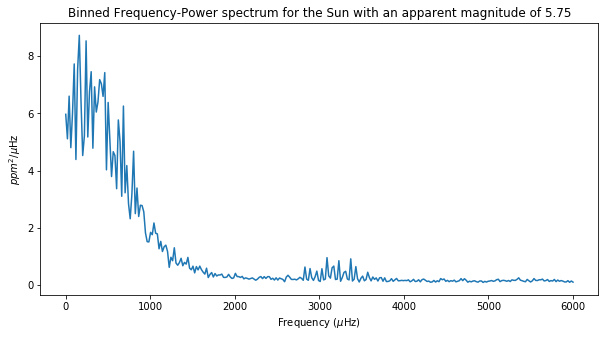

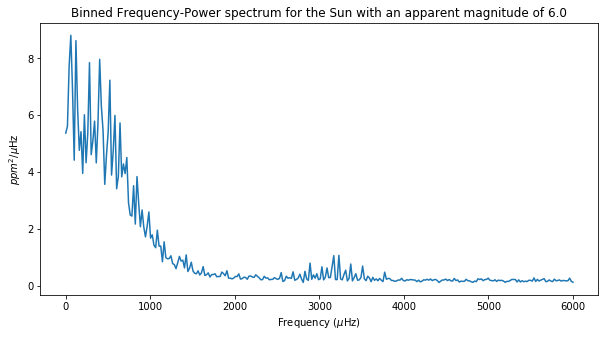

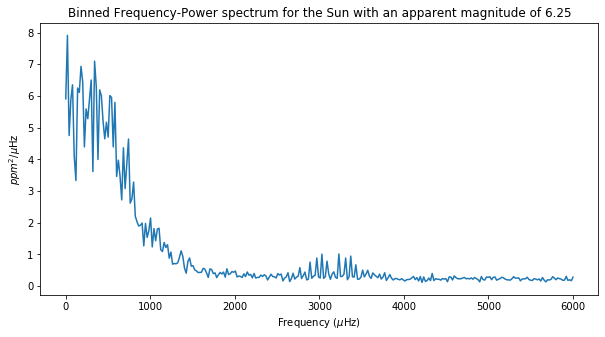

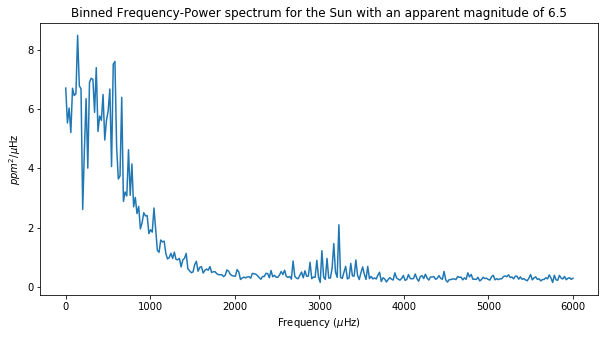

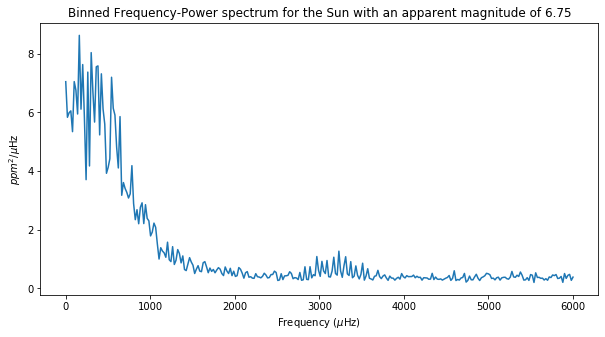

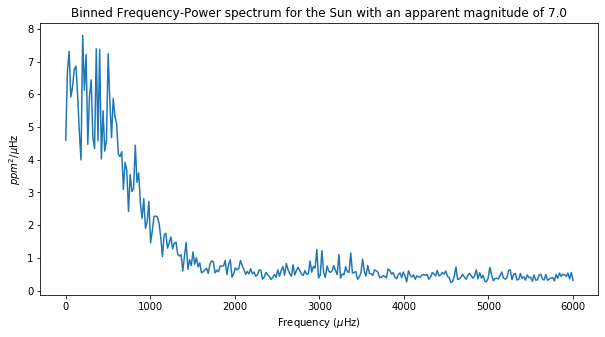

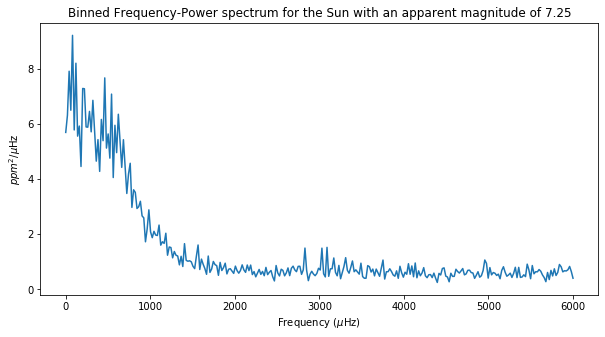

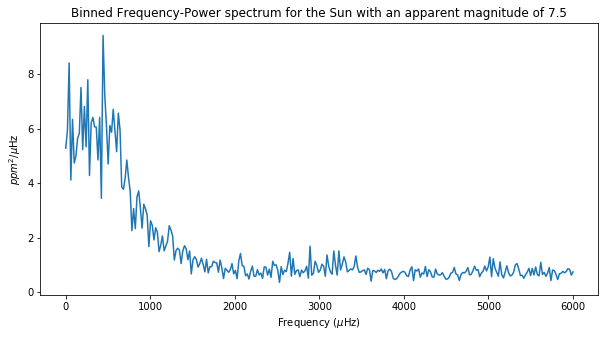

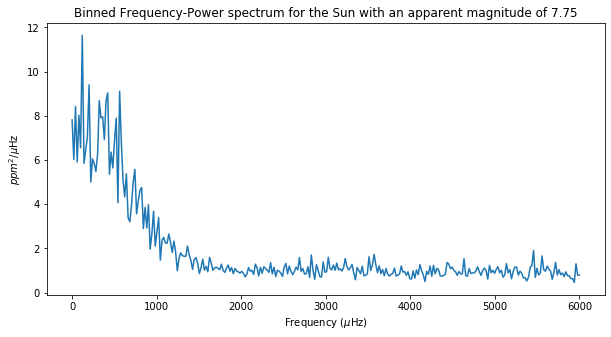

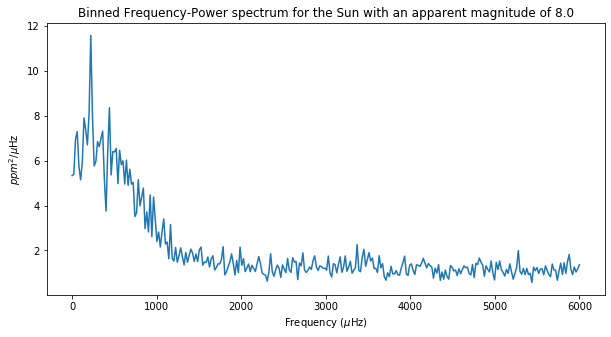

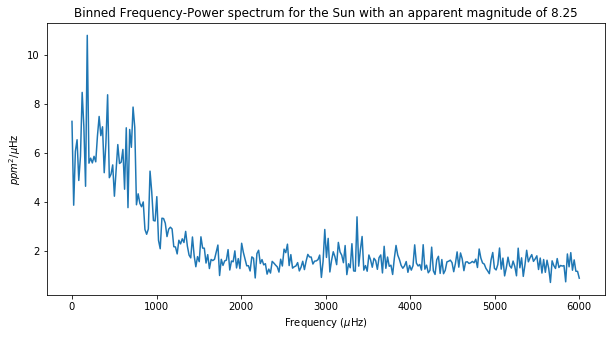

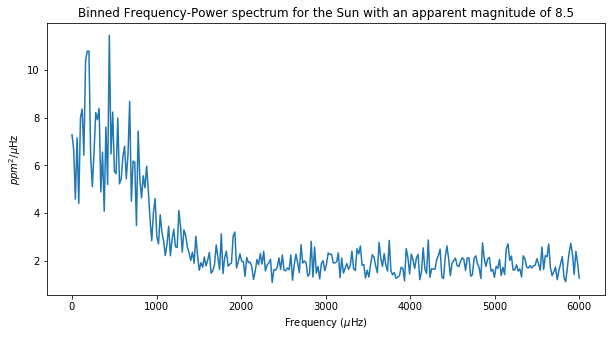

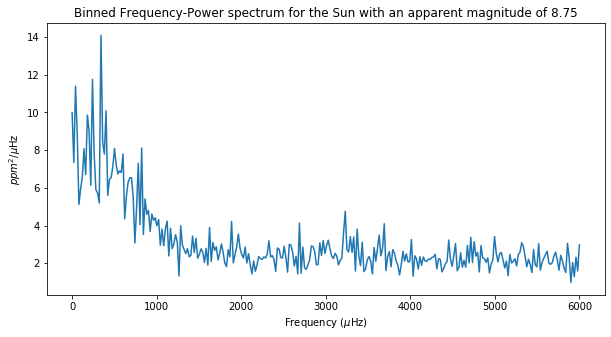

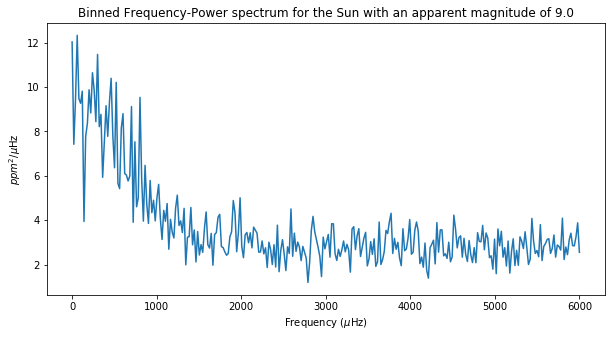

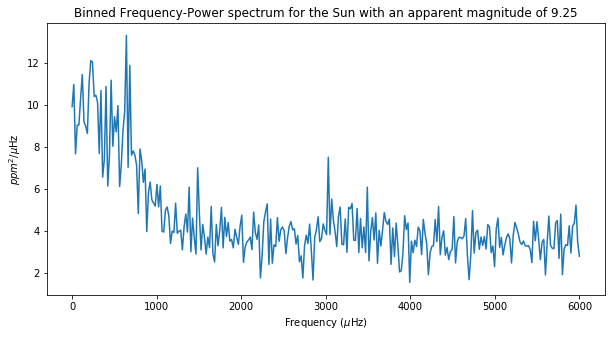

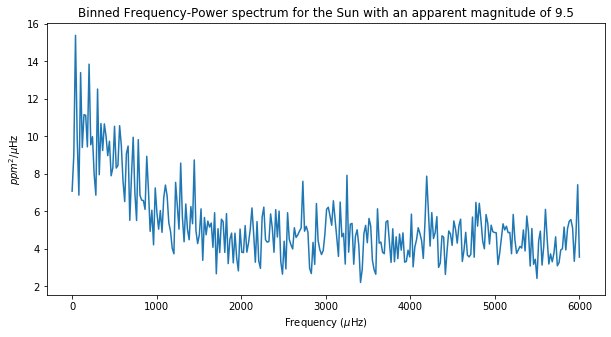

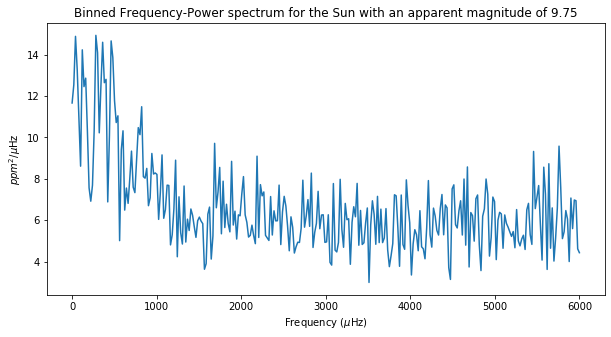

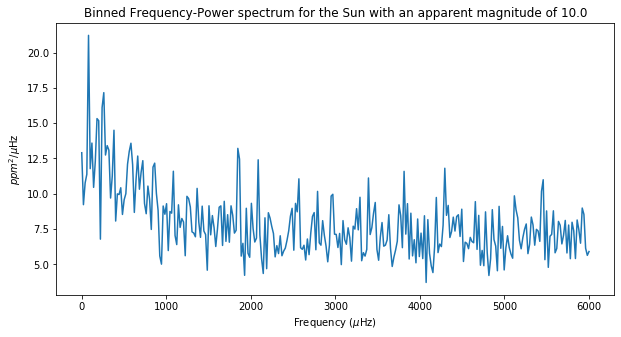

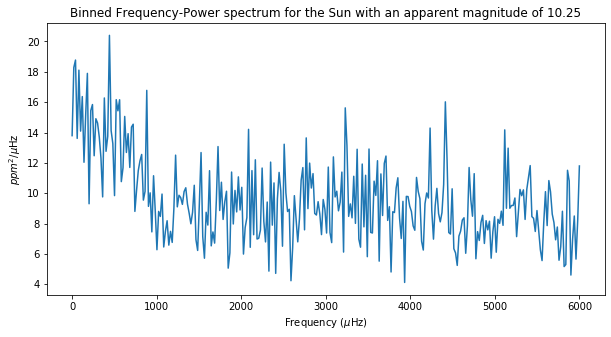

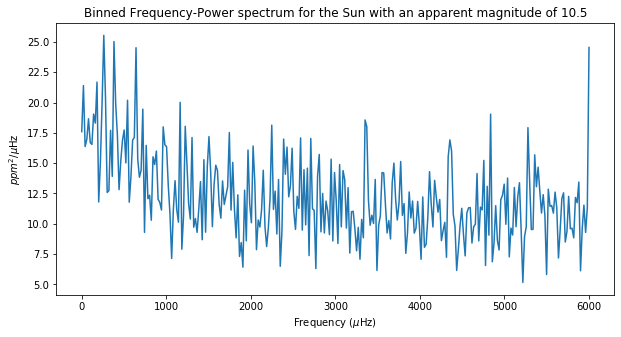

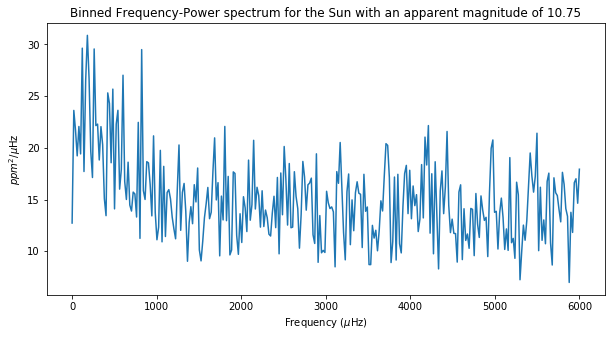

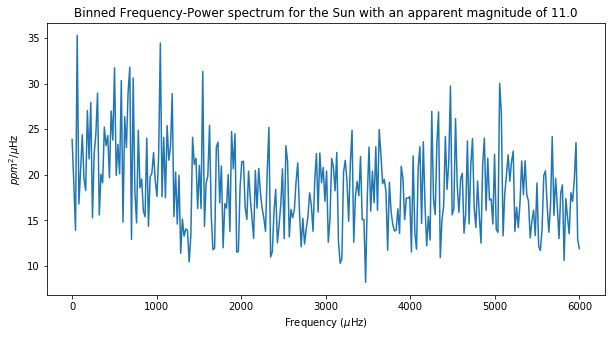

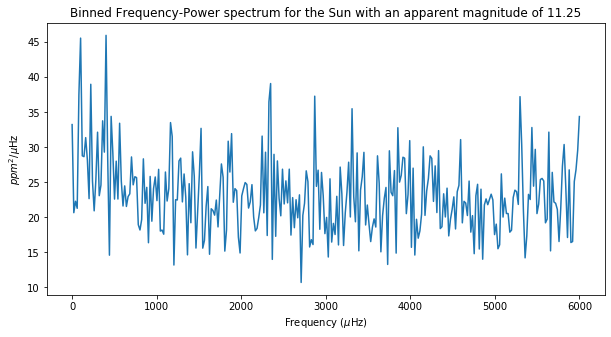

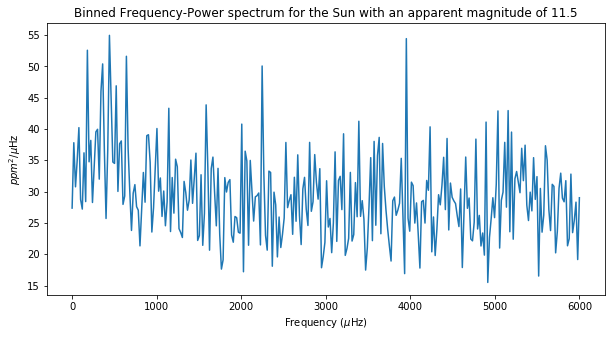

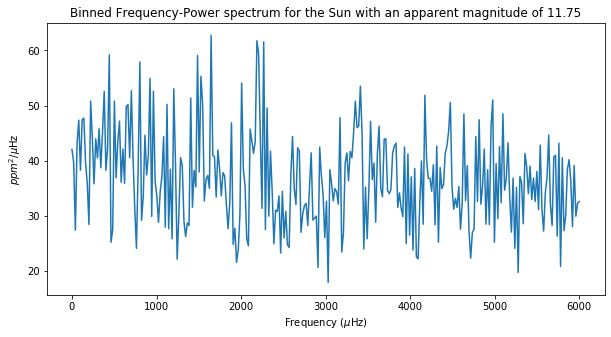

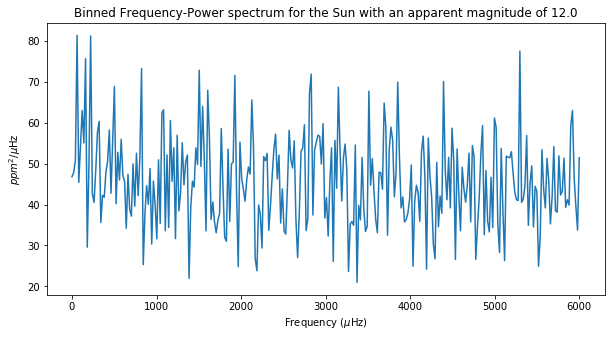

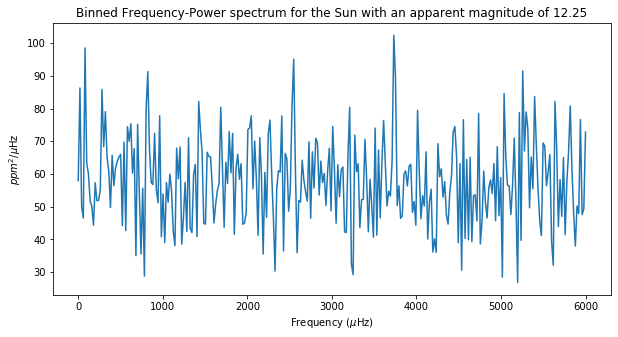

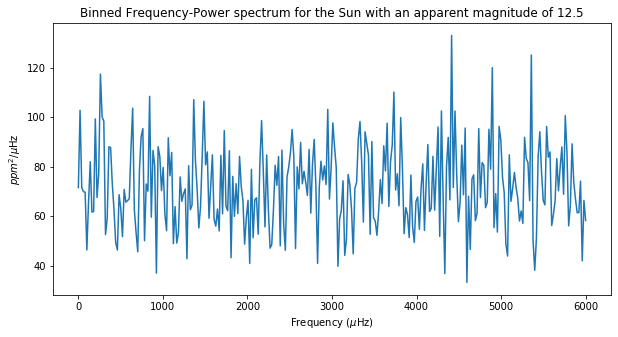

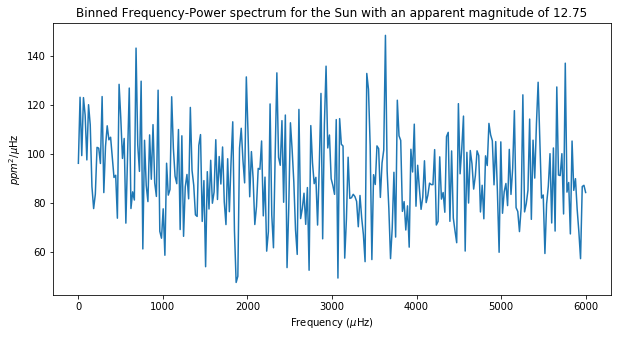

In [8]:
# BINNED SOLAR SPECTRUM FOR THE SUN WITH DIFFERENT APPARENT MAGNITUDES #
C=0
while C<len(TotalSpec)-1:
    Solar_Comp = addnoise(TotalSpec[C])
    #Solar_Comp_binned = SCb
    SCb = bin_it(Solar_Comp, 20)
    #binned_x-values = bx
    bx = np.linspace(0,len(Solar_Comp),len(SCb))
    plt.figure(figsize = (10, 5))
    plt.plot(bx, SCb)
    plt.title(f'Binned Frequency-Power spectrum for the Sun with an apparent magnitude of {mags[C]}')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$ppm^2$/$\mu$Hz')
    plt.show()
    C+=1

57


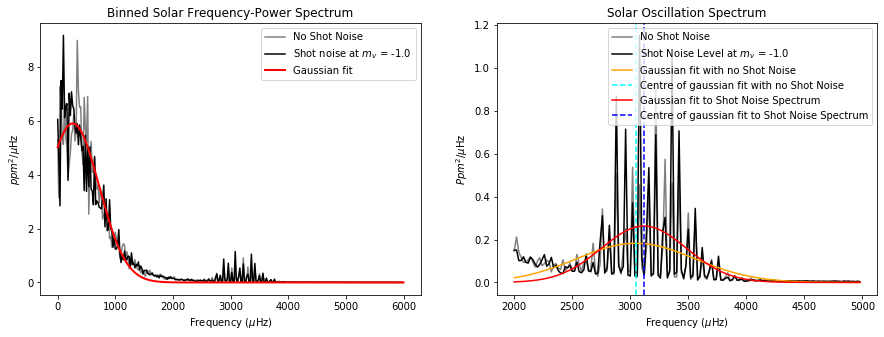

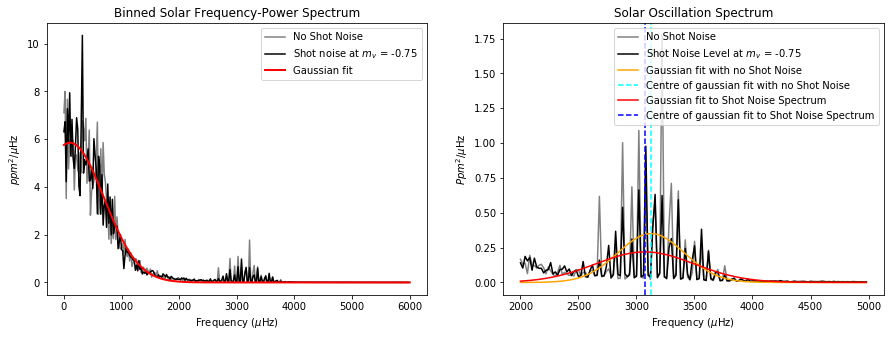

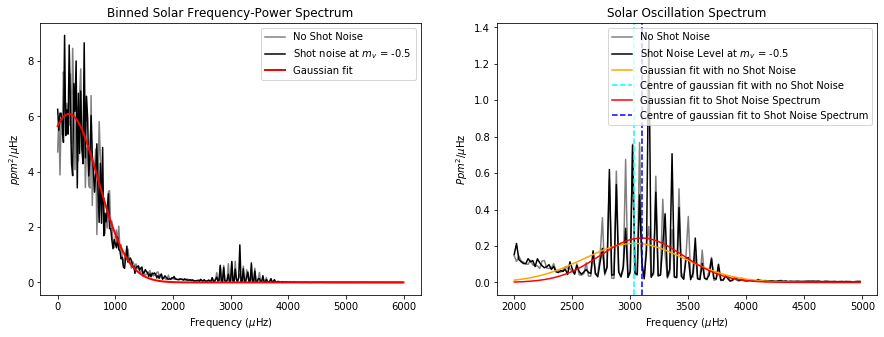

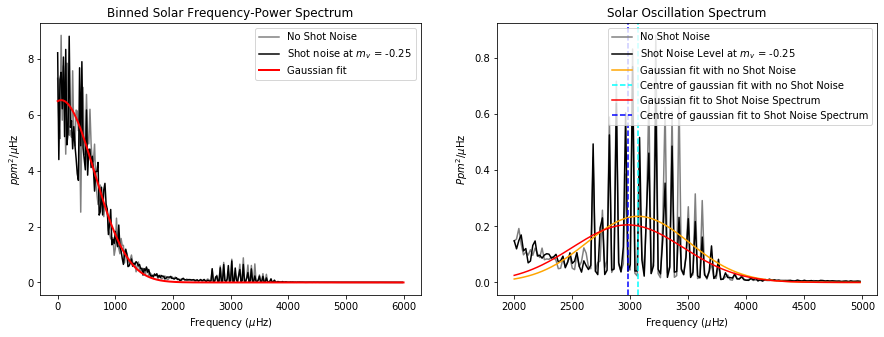

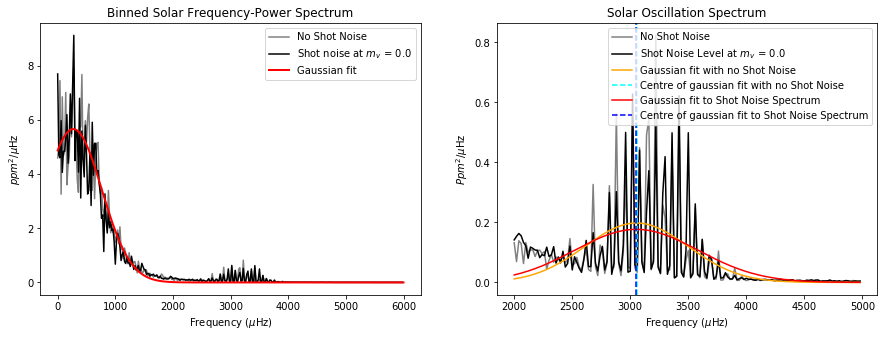

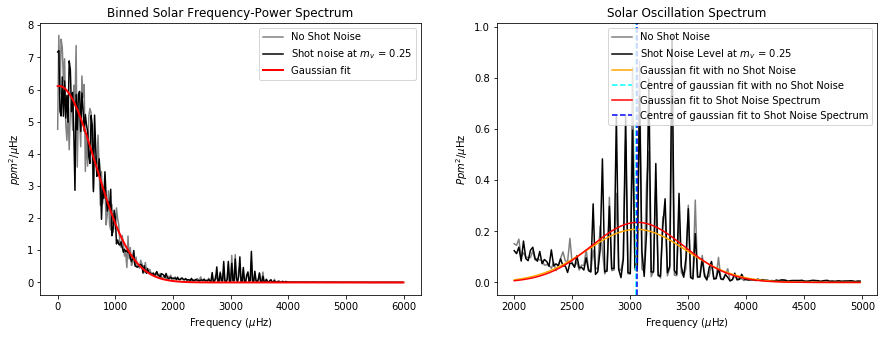

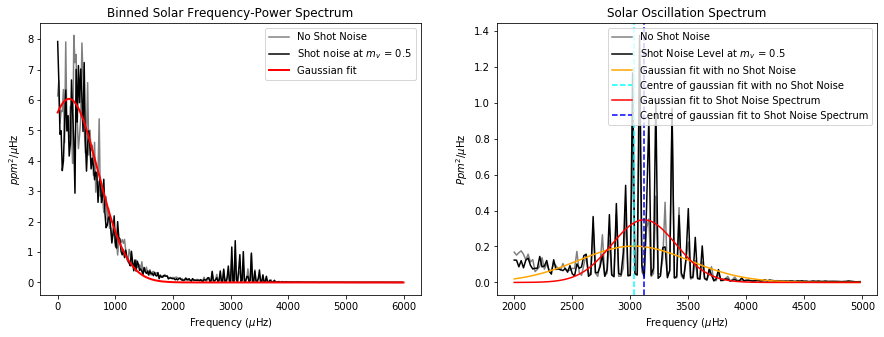

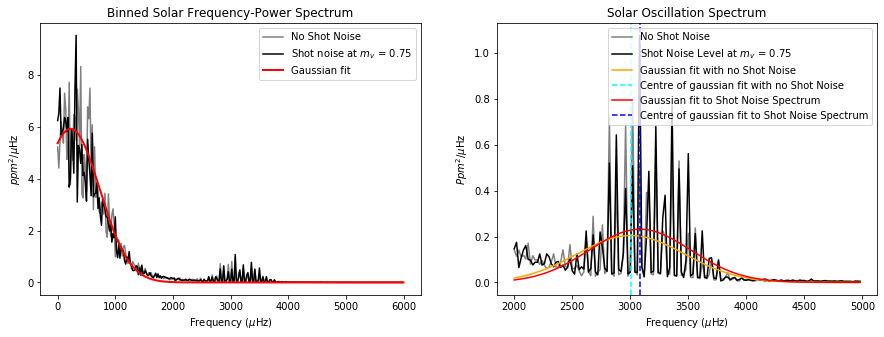

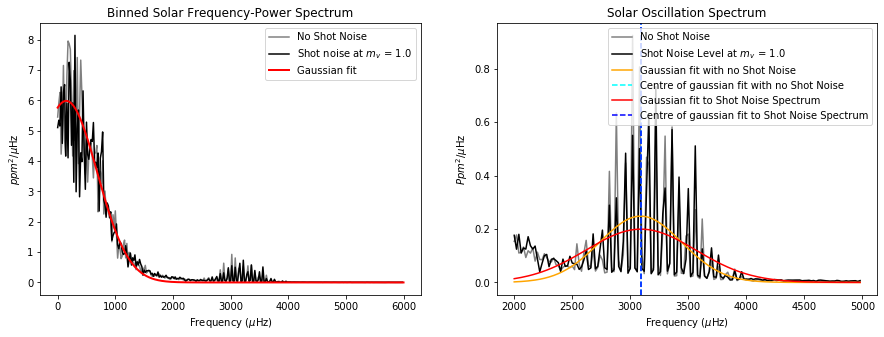

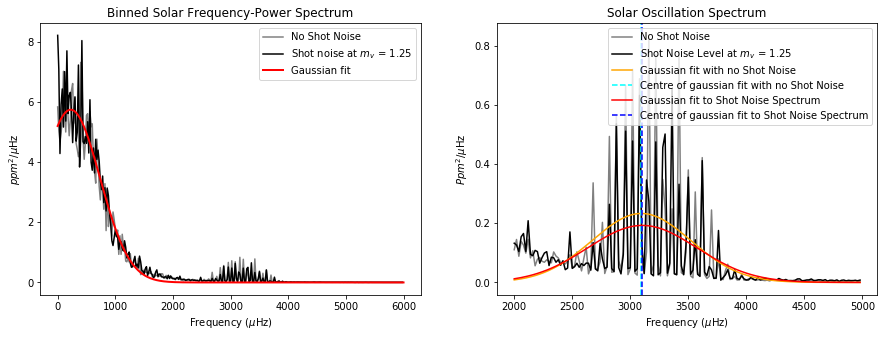

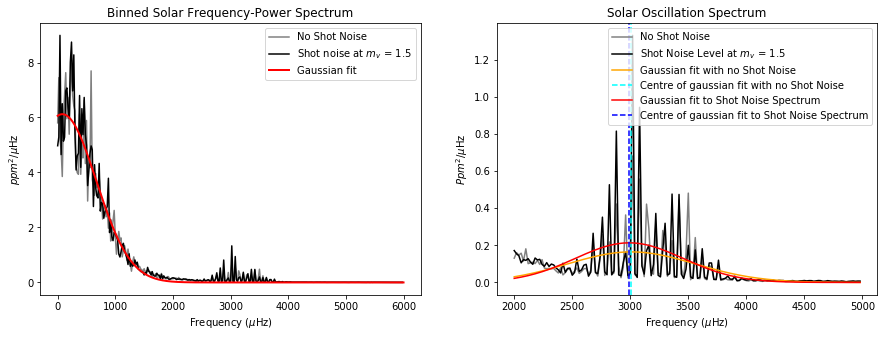

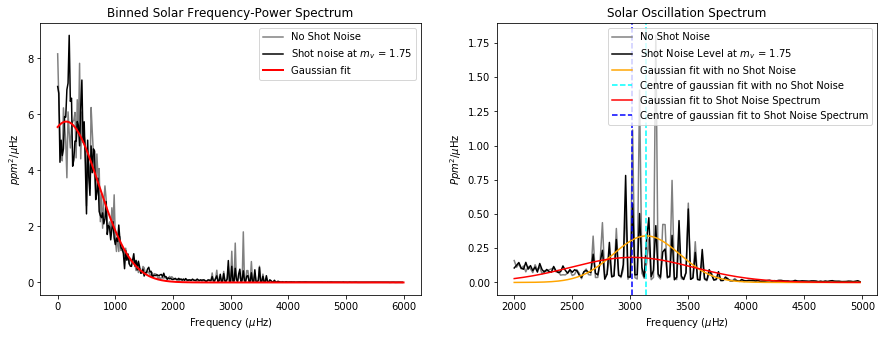

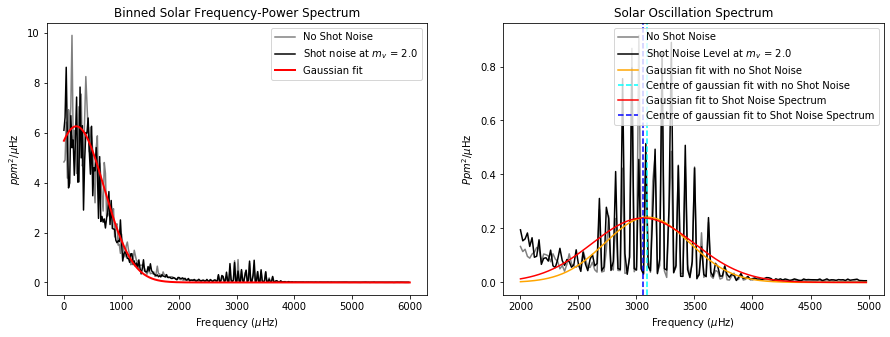

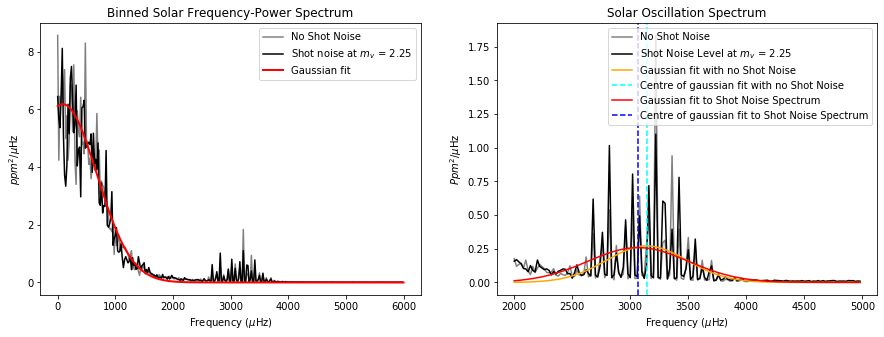

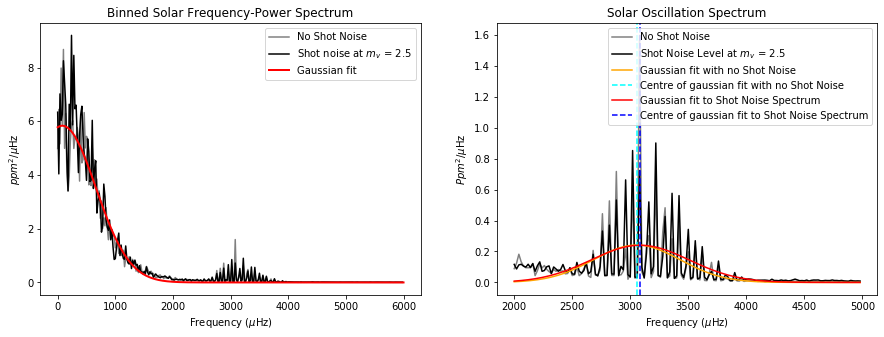

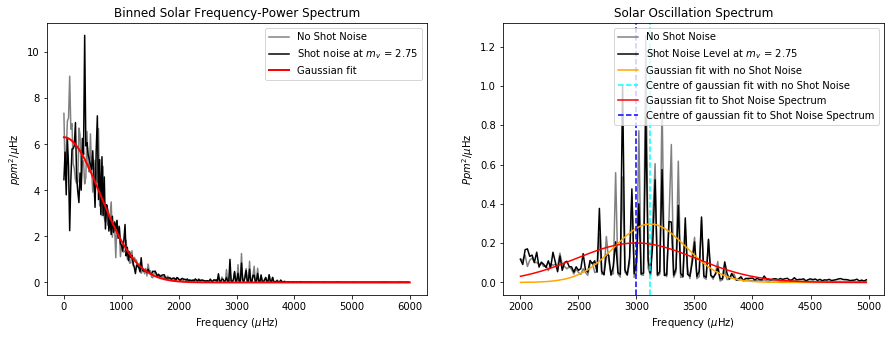

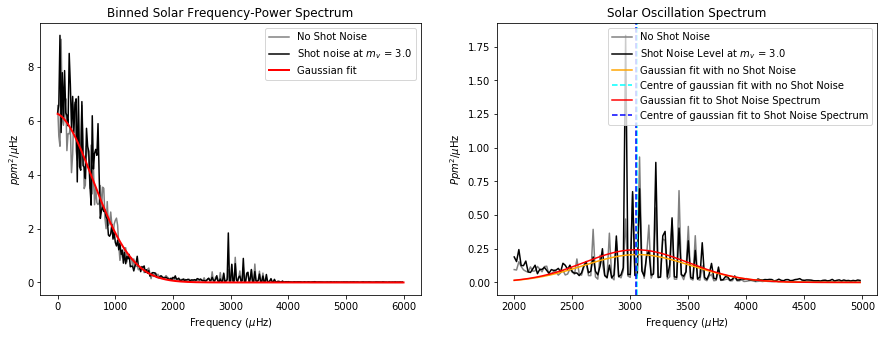

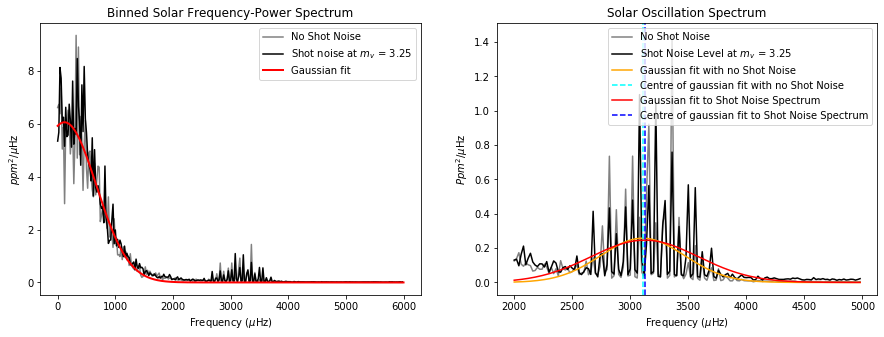

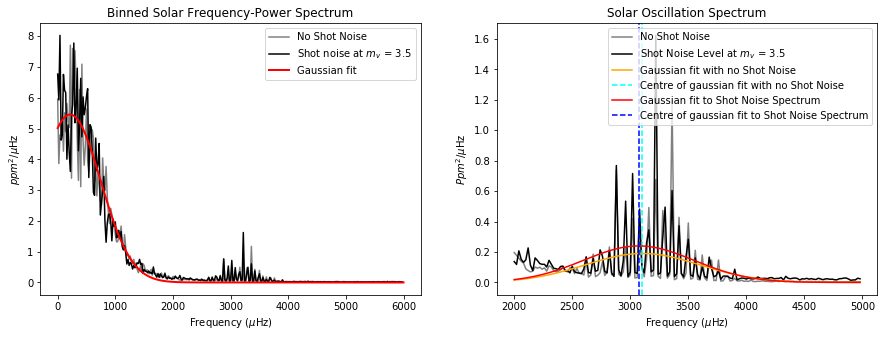

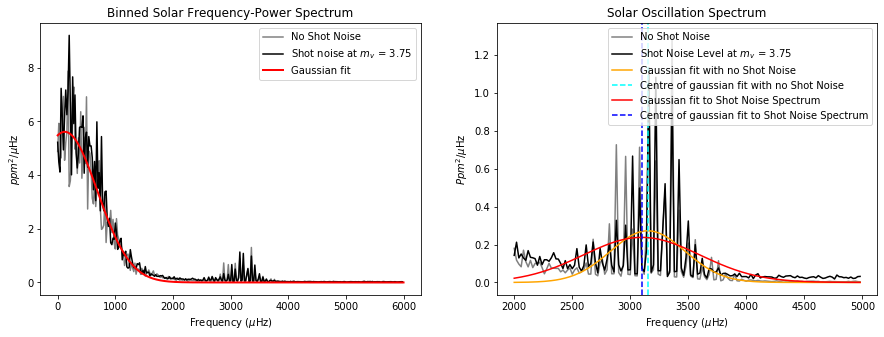

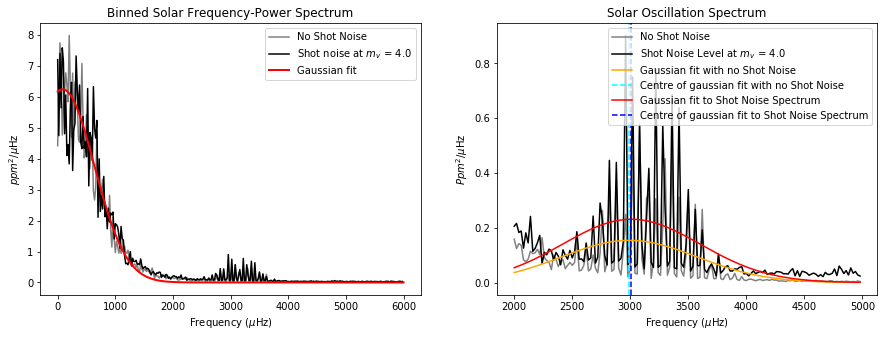

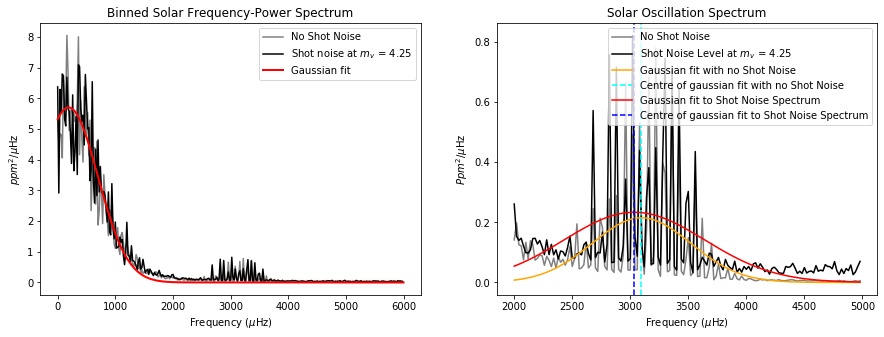

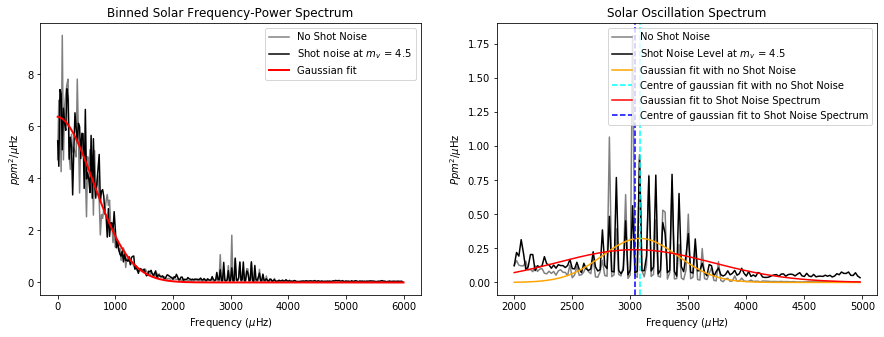

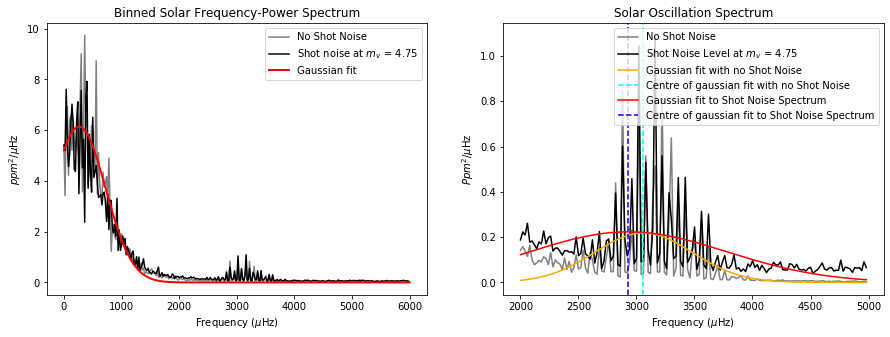

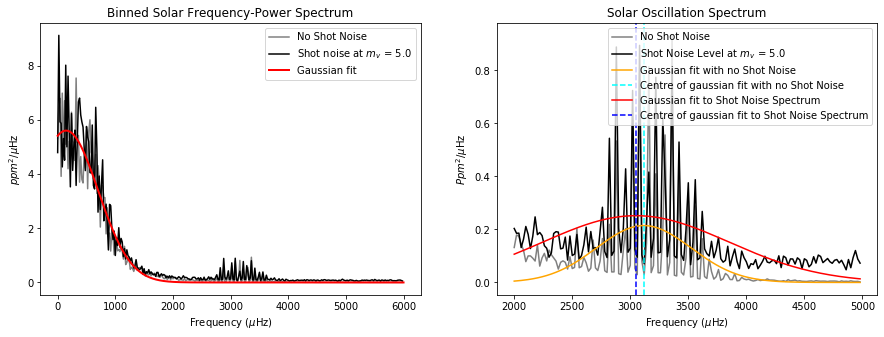

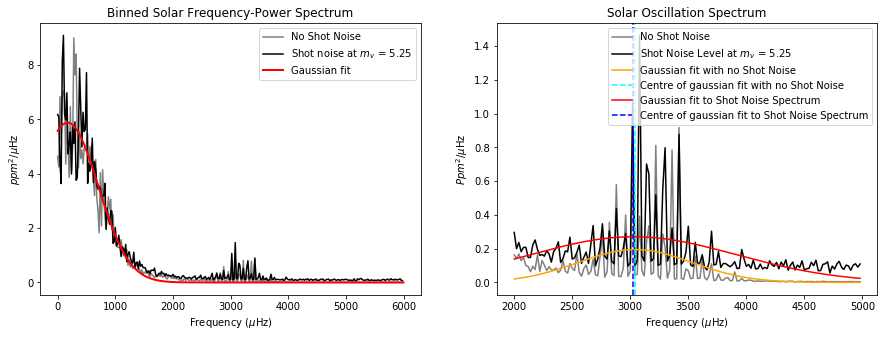

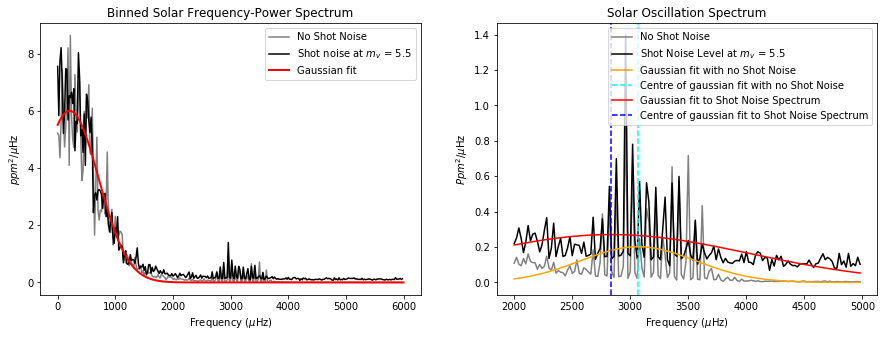

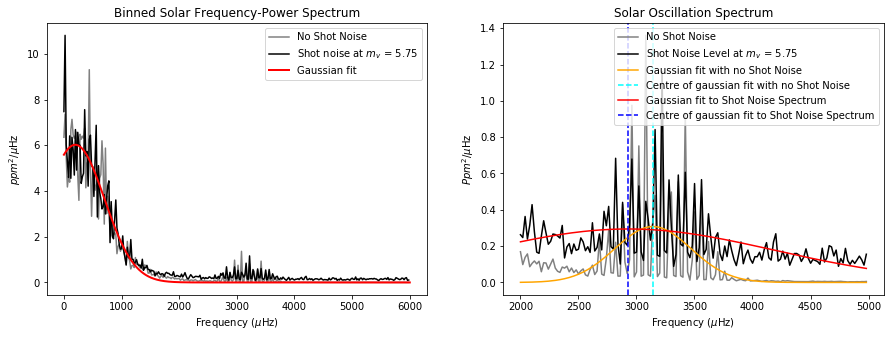

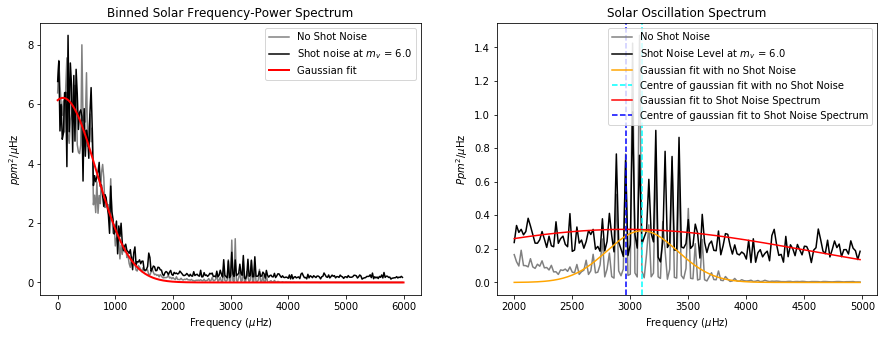

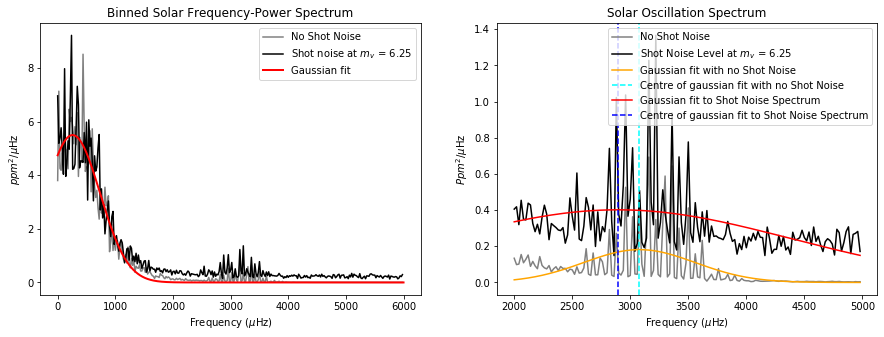

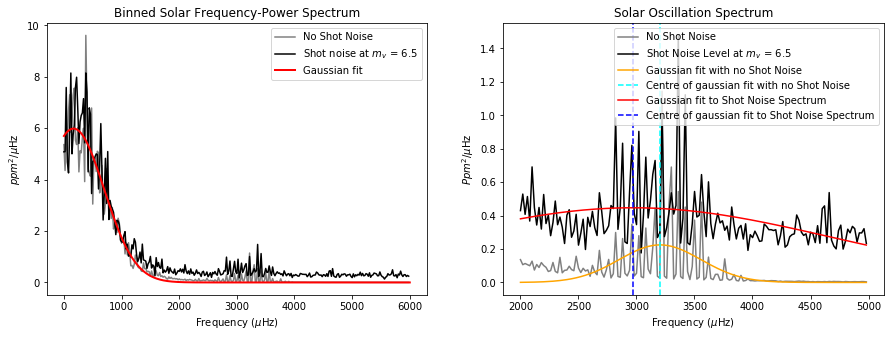

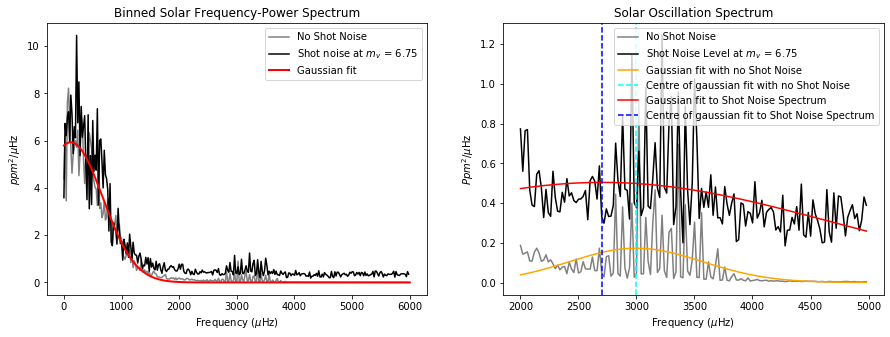

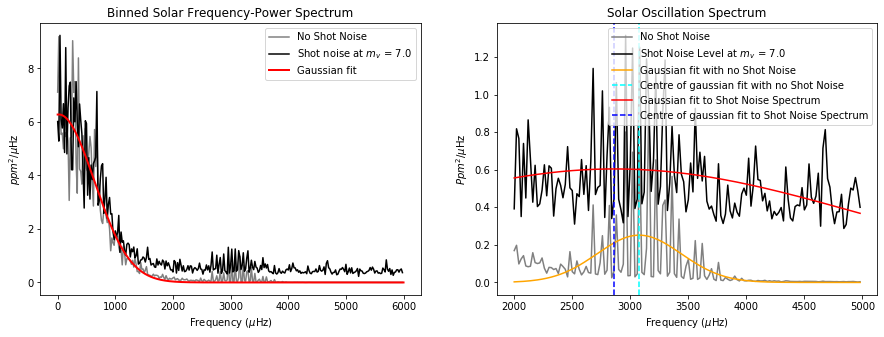

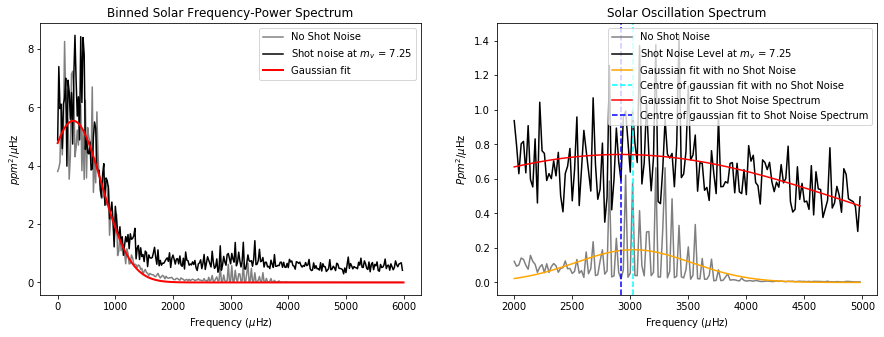

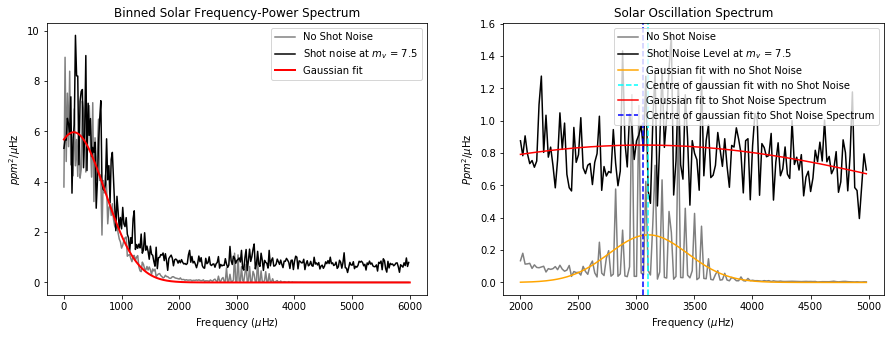

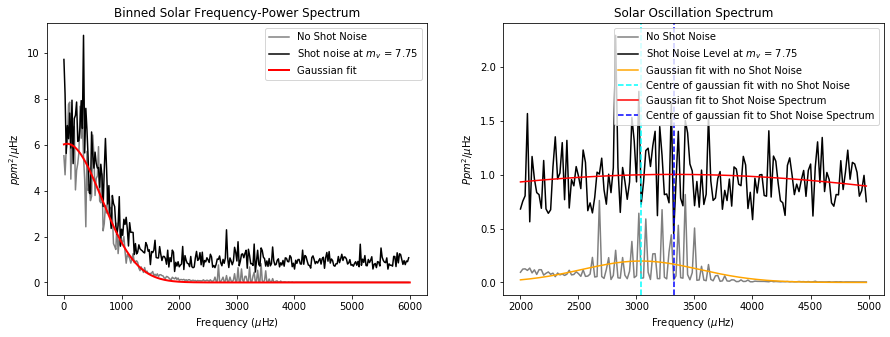

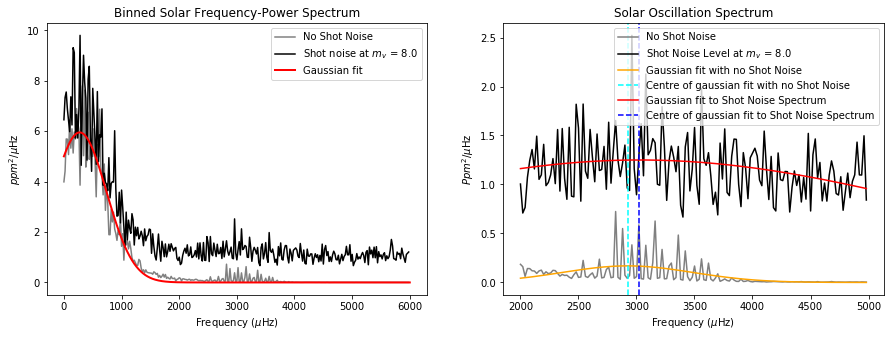

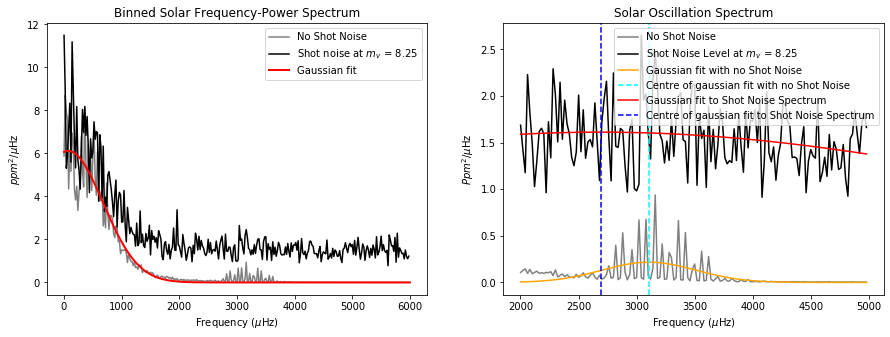

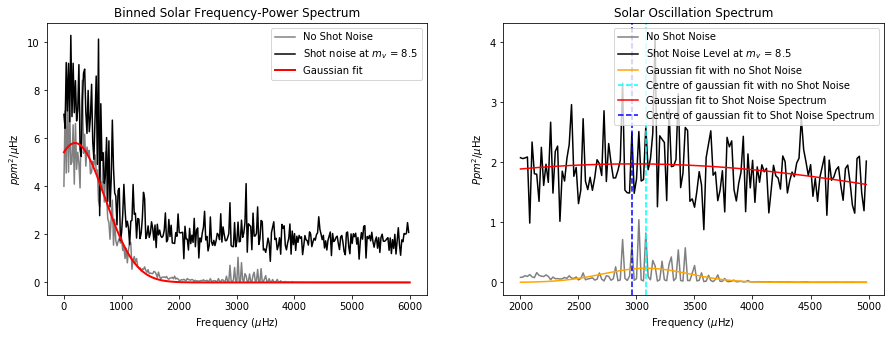

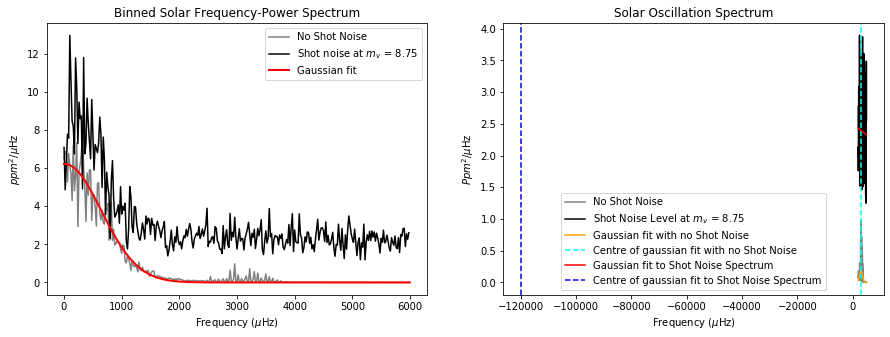

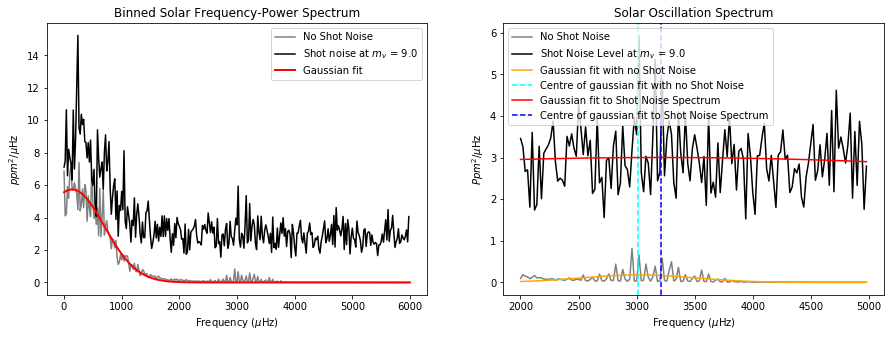

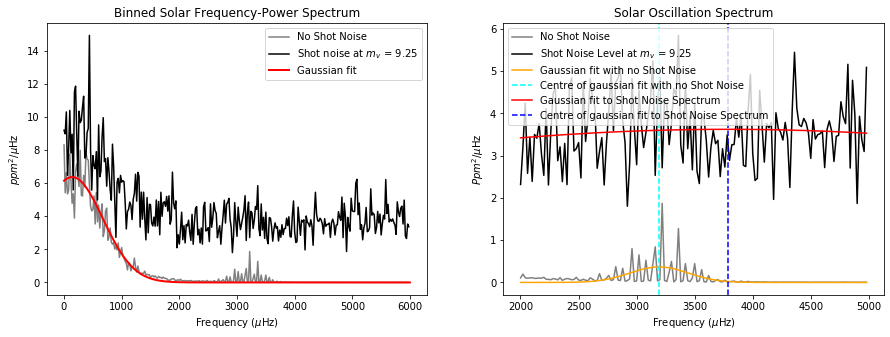

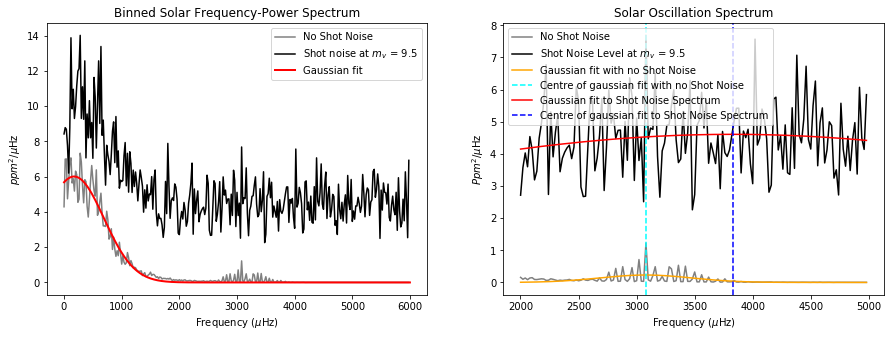

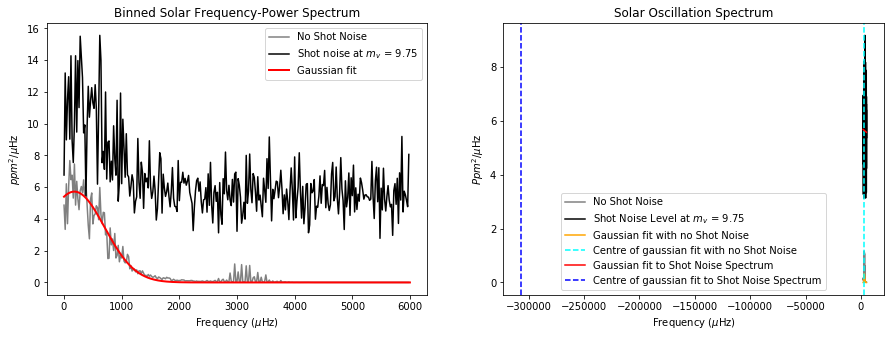

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

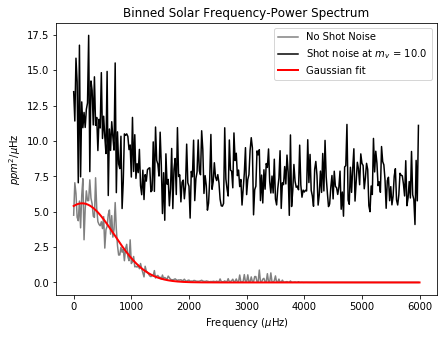

In [10]:
'''CODE BELOW IS CONTRIBUTED BY DAN HART, edited for my variable names'''

'''plots a gaussian'''
def peak(x,height,centre,width):
    return height*np.exp((-(x-centre)**2)/(2*width**2))

binsize = 20
xbin = x[0::binsize]

init_guess = [35, 0, 1000]

print(len(TotalSpec))

for C in range(0, len(TotalSpec)):
    #print(C)
    ysum = Osc + G
    ysums_i = TotalSpec[C]
    ysumn = addnoise(ysum)
    ysumns = addnoise(ysums_i)
    ybin = bin_it(ysumn, binsize)
    ybins = bin_it(ysumns, binsize)
    #print(mags[C])
    
    #gaussian fit on binned data
    best_valsfull, covar = curve_fit(peak, x[0::binsize], bin_it(ysumn,binsize), p0=init_guess)

    fig = plt.subplots(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(xbin, ybin, label='No Shot Noise', color='gray')
    plt.plot(xbin, ybins, label=f'Shot noise at $m_v$ = {mags[C]}', color='black' ) 
    plt.plot(x,peak(x,best_valsfull[0],best_valsfull[1],best_valsfull[2]),label='Gaussian fit', color='red', linewidth = 2)
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$ppm^2$/$\mu$Hz')
    plt.title('Binned Solar Frequency-Power Spectrum')
    plt.legend()
    #Zoom in and attempt gaussian fit

    xbinlim = xbin[100:250]
    ybinlim = ybin[100:250]
    ybinlims = ybins[100:250]
    init_guess = [2, 3000, 1000]
    best_valscut, covar = curve_fit(peak, xbinlim, ybinlim, p0=init_guess)
    best_valscutshot, covar = curve_fit(peak, xbinlim, ybinlims, p0=init_guess)

    plt.subplot(1,2,2)
    plt.plot(xbinlim, ybinlim, label='No Shot Noise', color='gray')
    plt.plot(xbinlim, ybinlims, label=f'Shot Noise Level at $m_v$ = {mags[C]}', color='black')
    plt.plot(xbinlim,peak(xbinlim,best_valscut[0],best_valscut[1],best_valscut[2]),label='Gaussian fit with no Shot Noise',color='orange')
    plt.axvline(x=best_valscut[1], label='Centre of gaussian fit with no Shot Noise', color='cyan', linestyle='--')
    plt.plot(xbinlim,peak(xbinlim,best_valscutshot[0],best_valscutshot[1],best_valscutshot[2]),label='Gaussian fit to Shot Noise Spectrum',color='red')
    plt.axvline(x=best_valscutshot[1], label='Centre of gaussian fit to Shot Noise Spectrum', color='blue', linestyle='--')
    plt.xlabel('Frequency ($\mu$Hz)')
    plt.ylabel('$Ppm^2$/$\mu$Hz')
    plt.title('Solar Oscillation Spectrum')
    plt.legend()
    plt.savefig('Code Plots (Solar Spec)/Fitted_Solar_Spectrum_(for mv = '+str(mags[C]) +').png', overwrite = True)
    plt.show()

In [ ]:
differences = []
differencesavg = []
shotnoises = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
variance = []
fails = []
for n in shotnoises:
    differences = []
    failcount = 0
    for z in np.arange(400):#adds the shot noise to a set of data 500 times
        try:
            vmag = np.full((6000), n) #here 8 defines the apparent magnitude
            shot_noise = 18*10**(-0.4*(11.0-vmag))
            ysums = Osc + G +shot_noise
            ysumns = addnoise(ysums)

   
            ybin = bin_it(Y, binsize)
            ybins = bin_it(Y_n, binsize)
            ybinlim = ybin[100:250]
            ybinlims = ybins[100:250]
            init_guess = [2, 3000, 1000]
            best_valscut, covar = curve_fit(peak, xbinlim, ybinlim, p0=init_guess)
            best_valscutshot, covar = curve_fit(peak, xbinlim, ybinlims, p0=init_guess)
            differences.append(best_valscut[1] - best_valscutshot[1])
        except:
            pass
    differencesavg.append(np.mean(differences))
    
print(differencesavg)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(shot_noises, differencesavg)
plt.xlabel('Shot Noise Levels/ Apparent Magnitude')
plt.ylabel('Average Difference in $\mu$Hz')
plt.title('Average Difference in Centroids of Plots with and without Shot Noise')


In [ ]:

#BIN PACKING TESTS
def peak(x,height,centre,width):
    '''plots a gaussian'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))

def gausgaus(x, height, centre, width, heightgaus, centregaus, widthgaus):
    base = heightgaus*np.exp((-(x-centregaus)**2)/(2*widthgaus**2))
    return height*np.exp((-(x-centre)**2)/(2*width**2))+base

def gausgran(x,height,centre,width):
    '''plots a gaussian acounting for granulation'''
    granulation = (4*np.sqrt(2)*tau_sun/1e6*(sigma_sun)**2)/(1+(2*np.pi*x*tau_sun/1e6)**4) #ppm squared per micro hertz
    return height*np.exp((-(x-centre)**2)/(2*width**2))+granulation

def bin_it(yvalues,binsize):
    '''groups an array in groups of a given size then averaging them'''
    N=int(math.ceil(len(yvalues)/binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q)
        C+=1
    return np.array(newy)


def getdiff(yvals, xvals, binsize, init_guess, trueval):
    ybin = bin_it(yvals, binsize)
    xbin = x[0::binsize]
    bf, covar = curve_fit(gausgran, xbin, ybin, p0=init_guess)
    print(bf)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(xbin, gausgran(xbin, bf[0], bf[1], bf[2]))
    return bf

def passfail(differences):
    var = np.var(differences)
    if var > 100:
        return False
    else:
        return True

#SHOT NOISE LEVEL TEST
shotnoises = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10]
differencesavg = []
variance = []
fails = []
for n in shotnoises:
    differences = []
    failcount = 0
    for z in np.arange(400):
        try:
            vmag = np.full((6000), n) #here 8 defines the apparent magnitude
            shot_noise = 18*10**(-0.4*(11.0-vmag))
            ysums = y1+y2+y3+y4+granulation+shot_noise
            ysumns = addnoise(ysums)
            
            ybin = bin_it(ysumn, binsize)
            ybins = bin_it(ysumns, binsize)
            ybinlim = ybin[100:250]
            ybinlims = ybins[100:250]
            init_guess = [2, 3000, 1000]
            best_valscut, covar = curve_fit(peak, xbinlim, ybinlim, p0=init_guess)
            best_valscutshot, covar = curve_fit(peak, xbinlim, ybinlims, p0=init_guess)
            differences.append(best_valscut[1] - best_valscutshot[1])
        except:
            failcount = failcount + 1
            pass
    differencesavg.append(np.mean(differences))
    variance.append(np.var(differences))
    fails.append(failcount)
    
print(differencesavg)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.plot(shotnoises,differencesavg)
ax.plot(shotnoises, variance, c='g')
ax.set_xlabel('Shot Noise Levels/ Apparent Magnitude')
ax.set_ylabel('Average Difference in $Ppm^2$/$\mu$Hz')
ax.set_title('Average Difference in Centroids of Plots with and without Shot Noise')

ax2 = ax.twinx()
ax2.plot(shotnoises, fails, c='r')
ax2.set_ylabel('Fitting Failures')